# 1. DATA COLLECTION

## 1.1. Topic

- Bộ dữ liệu ghi nhận các sự cố giữa cá mập và con người tại Úc, bao gồm các vụ tấn công, va chạm hoặc cố gắng cắn.

- Chủ đề thuộc lĩnh vực sinh thái biển và an toàn con người, phản ánh bối cảnh thực tế ngoài đời sống, giúp nghiên cứu hành vi cá mập, mức độ nguy hiểm, yếu tố môi trường và rủi ro đối với con người khi tham gia các hoạt động dưới nước. 

## 1.2. Data source

- Bộ dữ liệu: [Australian Shark-Incident Database (ASID)](https://taronga.org.au/conservation-and-science/australian-shark-incident-database)

- Tổ chức quản lý và thu thập: Taronga Conservation Society Australia, phối hợp với Flinders University và NSW Department of Primary Industries.

- Thời gian thu thập kéo dài từ 1791 đến hiện tại, được cập nhật theo từng năm.

## 1.3. Dataset license

- Bộ dữ liệu được chia sẻ công khai theo giấy phép mở thông qua GitHub của ASID ([GitHub – AustralianSharkIncidentDatabase](https://github.com/cjabradshaw/AustralianSharkIncidentDatabase)).

- Người sử dụng được phép dùng cho mục đích học thuật, nghiên cứu và các phân tích khoa học.

- Khi sử dụng hoặc trích dẫn cần ghi rõ nguồn gốc: "Australian Shark-Incident Database, Taronga Conservation Society Australia"

- Không có giới hạn thương mại cụ thể nhưng phải đảm bảo giữ nguyên tính toàn vẹn nội dung và ghi nhận nguồn theo quy định.

## 1.4. Collection method

- Dữ liệu được tổng hợp từ nhiều nguồn:

    - báo cáo của nhân chứng/nạn nhân

    - báo chí, truyền thông

    - báo cáo chính thức từ cơ quan thủy sản, cảnh sát, y tế

    - hồ sơ điều tra thực địa

- Sau khi tiếp nhận thông tin, Taronga tiến hành xác minh bằng khảo sát, phỏng vấn, báo cáo y tế và điều tra độc lập.

- Đối tượng khảo sát: các vụ việc có con người tham gia hoạt động dưới nước hoặc phương tiện nhỏ (surfboard, kayak, lặn…).

- Các vụ việc chỉ được đưa vào database nếu đáp ứng 3 tiêu chí: 
    - (i) người còn sống tại thời điểm xảy ra vụ.
    - (ii) người đang ở trong nước hoặc sử dụng phương tiện nhỏ như kayak, surfboard...
    - (iii) có biểu hiện rõ ràng của cá mập cắn người, thiết bị hoặc phương tiện nhỏ. Có thể ghi lại dù vết cắn không thành công (bumped, attempted bite). 

- Thời gian thu thập: hơn 230 năm dữ liệu lịch sử (từ 1791 đến nay).

- Hạn chế tiềm ẩn:

    - dữ liệu trước thế kỷ 20 có thể thiếu chính xác do báo cáo không đầy đủ

    - có thể tồn tại bias từ báo chí hoặc nhân chứng

    - không phải vụ việc nào cũng xác định được loài cá mập

## 1.5. Choice rationale

- Chủ đề mới lạ, mang tính thực tiễn, gần gũi với vấn đề an toàn con người trong tự nhiên.

- Dữ liệu có nhiều biến phong phú, cho phép khai thác nhiều hướng phân tích.

- Thông tin cung cấp có nhiều khía cạnh cần xử lí, phù hợp với tính chất môn học và đồ án.

- Bộ dữ liệu phù hợp với mục tiêu nghiên cứu khoa học dữ liệu của nhóm, có thể đưa ra nhận định, trực quan hóa và khám phá kiến thức mới.

# 2. DATA EXPLORATION

## 2.1. Dataset overview

In [656]:
# Import thư viện, load dữ liệu và chuẩn hóa tên cột

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập hiển thị 
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Hàm chuẩn hóa tên cột: bỏ ký tự đặc biệt, khoảng trắng, đổi sang lowercase
def clean_col_name(c):
    c = c.strip()
    c = c.replace(" ", "_").replace(".", "_").replace("/", "_")
    c = c.replace("(", "").replace(")", "").replace("<", "lt_").replace(">", "gt_")
    while "__" in c:
        c = c.replace("__", "_")
    return c.lower().strip("_")

data_path = "data/raw/SharkIncident.csv"
df = pd.read_csv(data_path, low_memory=False)

# Số dòng và cột
print("Số dòng:", df.shape[0])
print("Số cột:", df.shape[1])

# Chuẩn hóa tên các cột
df.columns = [clean_col_name(c) for c in df.columns]

print("5 dòng đầu:")
display(df.head())

Số dòng: 1283
Số cột: 60
5 dòng đầu:


,uin,incident_month,incident_year,victim_injury,state,location,latitude,longitude,site_category,site_category_comment,shark_common_name,shark_scientific_name,shark_identification_method,shark_identification_source,shark_length_m,basis_for_length,provoked_unprovoked,provocative_act,no_sharks,victim_activity,fish_speared?,commercial_dive_activity,object_of_bite,present_at_time_of_bite,direction_first_strike,shark_behaviour,victim_aware_of_shark,shark_captured,injury_location,injury_severity,victim_gender,victim_age,victim_clothing,clothing_coverage,dominant_clothing_colour,other_clothing_colour,clothing_pattern,fin_colour,diversionary_action_taken,diversionary_action_outcome,people_lt_3m,people_3-15m,time_of_incident,depth_of_incident_m,teeth_recovered,time_in_water_min,water_temperature_°c,total_water_depth_m,water_visability_m,distance_to_shore_m,spring_or_neap_tide,tidal_cycle,wind_condition,weather_condition,air_temperature_°c,personal_protective_device,deterrent_brand_and_type,data_source,reference,unnamed:_59
0,1,1,1791,fatal,NSW,sydney (near),-33.86,151.2000,coastal,NaN,white shark,Carcharodon carcharias,"bite analysis, shark behaviour, geographical location",NaN,NaN,NaN,unprovoked,NaN,NaN,swimming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,torso,major lacerations,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,book,"shark&survl, whitley 1958, book ref 1793",NaN
1,2,3,1803,injured,WA,"shark bay, faure island",-25.8826,113.9226,coastal,bay to open ocean,tiger shark,Galeocerdo cuvier,"bite analysis, shark behaviour, geographical location",NaN,NaN,NaN,unprovoked,NaN,1.0,swimming,NaN,NaN,NaN,NaN,NaN,swam at victim,Y,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pushed at shark,NaN,NaN,NaN,NaN,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,book,"balgridge,green,taylor,whitley 1940",NaN
2,3,1,1807,injured,NSW,"sydney harbour, cockle bay",-33.8661,151.2010,estuary/harbour,bay,bull shark,Carcharhinus leucas,"bite analysis, shark behaviour",NaN,NaN,NaN,unprovoked,NaN,1.0,swimming,NaN,NaN,NaN,NaN,NaN,bit victim on wrist,NaN,NaN,"arm, hand",minor lacerations,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media outlet,sydney gazette 18.1.1807,NaN
3,4,1,1820,fatal,TAS,"sweetwater point, pitt water",-42.8025,147.4868,estuary/harbour,bay to open ocean,NaN,NaN,NaN,NaN,NaN,NaN,provoked,NaN,1.0,swimming,NaN,NaN,NaN,catch,NaN,bit victim on leg,N,NaN,leg,major lacerations,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,witness account,"shark&survl, c. black researcher",NaN
4,5,1,1825,injured,NSW,"sydney harbour, kirribili point",-33.8527,151.2188,estuary/harbour,harbour,bull shark,Carcharhinus leucas,"bite analysis, shark behaviour, geographical location",NaN,NaN,NaN,unprovoked,NaN,1.0,swimming,NaN,NaN,NaN,NaN,NaN,bit legs,NaN,NaN,leg,minor lacerations,male,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media outlet,maitland daily mercury 13.11.1899,NaN


### 2.1.1. Basic information
- Dữ liệu gốc gồm: 1283 dòng và 60 cột.

- Mỗi dòng tương ứng một vụ việc — gồm thông tin về thời gian (tháng, năm), vị trí (latitude, longitude, bang/tiểu bang, địa điểm cụ thể), tình trạng nạn nhân (thương tích, tử vong, không bị thương), loài cá mập nếu biết, hoạt động của nạn nhân lúc xảy ra vụ việc, và nhiều biến khác liên quan: điều kiện nước, thời tiết, hoạt động lặn/câu cá, sự kiện kích động (provoked / unprovoked), thông tin về thiết bị bảo hộ, v.v.

- Dữ liệu ban đầu được lưu dưới dạng .xlsl, được chuyển về .csv và có tổng kích thước 436KB.

### 2.1.2. Data integrity

In [657]:
# Kiểm tra duplicated rows
dups = df.duplicated()
print(f"\nSố dòng trùng lặp: {dups.sum()}")


Số dòng trùng lặp: 0


In [658]:
empty_rows = df.isnull().all(axis=1).sum()
print(f"Số dòng hoàn toàn trống: {empty_rows}")

Số dòng hoàn toàn trống: 0


In [659]:
print("Số ID trùng lặp:", df['uin'].duplicated().sum())

Số ID trùng lặp: 0


### 2.1.3. Column inventory

| Tên cột                                                                 | Ý nghĩa                                                                         |
| ------------------------------------------------------------------------ | ------------------------------------------------------------------------------- |
| **uin**                                                                  | Mã định danh duy nhất cho mỗi vụ việc.                 |
| **incident_month**                                                       | Tháng xảy ra vụ việc.                              |
| **incident_year**                                                        | Năm xảy ra vụ việc(yyyy).                                                               |
| **victim_injury**                                                        | Loại thương tích (fatal / injured / uninjured)                                 |
| **state**                                                                | Bang/khu vực địa lý nơi vụ việc xảy ra.                                         |
| **location**                                                             | Địa điểm cụ thể hơn của sự cố (bãi biển, vùng biển…).                           |
| **latitude**, **longitude**                                              | Toạ độ địa lý của vụ tấn công.                                                  |
| **site_category**, **site_category_comment**                             | Loại địa điểm (bơi, lặn, câu cá…) + ghi chú bổ sung.                            |
| **shark_common_name**                                                    | Tên thông thường của loài cá mập liên quan tới sự cố.                             |
| **shark_scientific_name**                                                | Tên khoa học của loài cá mập liên quan tới sự cố.                                              |
| **shark_identification_method**                                          | Phương pháp xác định loài (DNA, răng, vết cắn, hành vi…).                          |
| **shark_identification_source**                                          | Nguồn xác nhận thông tin loài (báo cáo, nhân chứng…).                           |
| **shark_length_m**                                                       | Chiều dài ước tính của cá mập (m).                                              |
| **basis_for_length**                                                     | Cơ sở để ước lượng chiều dài (quan sát, đo đạc, camera…).                       |
| **provoked_unprovoked**                                                  | Vụ tấn công mang tính tự nhiên hay bị kích động (unprovoked / provoked).        |
| **provocative_act**                                                      | Hành động cụ thể gây kích động (nếu có).                                        |
| **no_sharks**                                                            | Số lượng cá mập xuất hiện.                                  |
| **victim_activity**                                                      | Nạn nhân đang làm gì tại thời điểm bị tấn công (bơi, lướt ván…).                |
| **fish_speared?**                                                        | Cá mập có bị tấn công/thương tích hay không. |
| **commercial_dive_activity**                                             | Hoạt động lặn có mang tính thương mại/tour hay cá nhân.                         |
| **object_of_bite**                                                       | Bộ phận bị cá mập cắn: người, ván lướt, thuyền…                                 |
| **present_at_time_of_bite**                                              | Những gì xuất hiện cạnh nạn nhân (đàn cá, chim biển…).                          |
| **direction_first_strike**                                               | Hướng tiếp cận ban đầu của cá mập.                                              |
| **shark_behaviour**                                                      | Hành vi quan sát được (rình rập, bơi vòng…).                                    |
| **victim_aware_of_shark**                                                | Nạn nhân có phát hiện cá mập trước khi bị cắn hay không.                        |
| **shark_captured**                                                       | Cá mập có bị bắt lại sau sự cố hay không.                                       |
| **injury_location**                                                      | Vị trí thương tích trên cơ thể.                                                 |
| **injury_severity**                                                      | Mức độ thương tích (nhẹ, trung bình, nghiêm trọng, tử vong…).                   |
| **victim_gender**, **victim_age**                                        | Giới tính và độ tuổi nạn nhân.                                                   |
| **victim_clothing**, **clothing_coverage**, **dominant_clothing_colour** | Thông tin trang phục.          |
| **other_clothing_colour**, **clothing_pattern**                          | Màu sắc/phối hoa văn phụ của trang phục.                                   |
| **fin_colour**                                                           | Màu vây/flippers của nạn nhân(>=2 màu = multicolour).                                                   |
| **diversionary_action_taken**                                            | Nạn nhân/xung quanh có hành động xua đuổi không.                                |
| **diversionary_action_outcome**                                          | Kết quả hành động xua đuổi đó.                                                           |
| **people_lt_3m**, **people_3-15m**                                       | Số người có mặt gần nạn nhân trong bán kính 3m hoặc 3–15m.                      |
| **time_of_incident**                                                     | Thời điểm xảy ra sự cố (định dạng ví dụ: 1830).                               |
| **depth_of_incident_m**, **total_water_depth_m**                         | Độ sâu nơi xảy ra sự cố và độ sâu tổng khu vực.                                  |
| **teeth_recovered**                                                      | Có thu hồi được răng/mảnh răng nào không.                 |
| **time_in_water_min**                                                    | Thời gian nạn nhân đã ở dưới nước trước vụ việc (phút).                                |
| **water_temperature_°c**, **air_temperature_°c**                         | Nhiệt độ nước và nhiệt độ không khí.                                            |
| **water_visability_m**                                                   | Tầm nhìn dưới nước (m).                                                         |
| **distance_to_shore_m**                                                  | Khoảng cách từ vị trí bị tấn công tới bờ.                                       |
| **spring_or_neap_tide**, **tidal_cycle**                                 | Trạng thái thuỷ triều.                        |
| **wind_condition**, **weather_condition**                                | Điều kiện gió và thời tiết.                                 |
| **personal_protective_device**                                           | Nạn nhân có mặc đồ bảo hộ hay không.                                         |
| **deterrent_brand_and_type**                                             | Loại thiết bị chống cá mập được sử dụng.                                        |
| **data_source**, **reference**                                           | Nguồn gốc dữ liệu, tài liệu tham khảo.                                          |
| **unnamed:_59**                                                          | Cột rác.                                            |


In [660]:
# Các cột cần loại bỏ
cols_to_drop = [
    "uin",                   # Mã định danh duy nhất (không có giá trị phân tích)
    "data_source",           # Nguồn ghi nhận (quá chi tiết/không ảnh hưởng đến sự cố)
    "reference",             # Tài liệu tham khảo (không có giá trị phân tích)

    # Cột trùng lặp/Thông tin chi tiết quá mức
    "shark_scientific_name", # Tên khoa học (trùng lặp ý nghĩa với shark_common_name)
    "site_category_comment", # Ghi chú bổ sung 
    "provocative_act",       # Hành động kích động cụ thể (quá chi tiết/thường missing)
    "victim_clothing",       # Thông tin quần áo (vì đã có cột màu và hoa văn)
    "clothing_coverage",     # Độ che phủ quần áo (quá chi tiết, thường missing)
    "other_clothing_colour", # Màu phụ của quần áo
    "shark_identification_source", # Nguồn xác nhận loài (quá chi tiết, không ảnh hưởng đến phân tích)

    # Xóa cột tọa độ vì đã có cột location
    "latitude",    
    "longitude"         
]

df = df.drop(columns=cols_to_drop)

print(f"Đã loại bỏ {len(cols_to_drop)} cột.")
print("Các cột bị loại bỏ:")
print(cols_to_drop)
print(f"Kích thước data sau khi loại bỏ: {df.shape}")

Đã loại bỏ 12 cột.
Các cột bị loại bỏ:
['uin', 'data_source', 'reference', 'shark_scientific_name', 'site_category_comment', 'provocative_act', 'victim_clothing', 'clothing_coverage', 'other_clothing_colour', 'shark_identification_source', 'latitude', 'longitude']
Kích thước data sau khi loại bỏ: (1283, 48)


### 2.1.4. Data types

In [661]:
# in các cột và kiểu dữ liệu ra
col_info = pd.DataFrame({
    "dtype": df.dtypes
})
display(col_info)

,dtype
incident_month,int64
incident_year,int64
victim_injury,object
state,object
location,object
site_category,object
shark_common_name,object
shark_identification_method,object
shark_length_m,object
basis_for_length,object


Kiểu dữ liệu của các biến `latitude, shark_length_m, victim_age, time_of_incident, time_in_water_min, depth_of_incident_m, total_water_depth_m` hiện đang là object thay vì number, vì vậy cần chuyển đổi về dạng số trước khi đưa vào phân tích.

In [662]:
# Các cột object cần chuyển sang dạng số
to_convert_cols = [
    "shark_length_m", "victim_age",
    "time_of_incident", "time_in_water_min",
    "depth_of_incident_m", "total_water_depth_m"
]

for col in to_convert_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", ".", regex=False)      # đổi dấu phẩy thành dấu chấm
        .str.extract(r"([-+]?[0-9]*\.?[0-9]+)")  # tách giá trị số 
        .astype(float)                                          
    )

## 2.2. Missing value analysis


Bảng tổng hợp missing values:

                             missing_count  missing_percent
spring_or_neap_tide                   1283           100.00
unnamed:_59                           1282            99.92
fish_speared?                         1279            99.69
deterrent_brand_and_type              1277            99.53
clothing_pattern                      1271            99.06
fin_colour                            1251            97.51
tidal_cycle                           1249            97.35
air_temperature_°c                    1240            96.65
personal_protective_device            1227            95.64
weather_condition                     1226            95.56
teeth_recovered                       1223            95.32
diversionary_action_outcome           1217            94.86
water_visability_m                    1211            94.39
wind_condition                        1202            93.69
people_3-15m                          1198            93.37
water_te

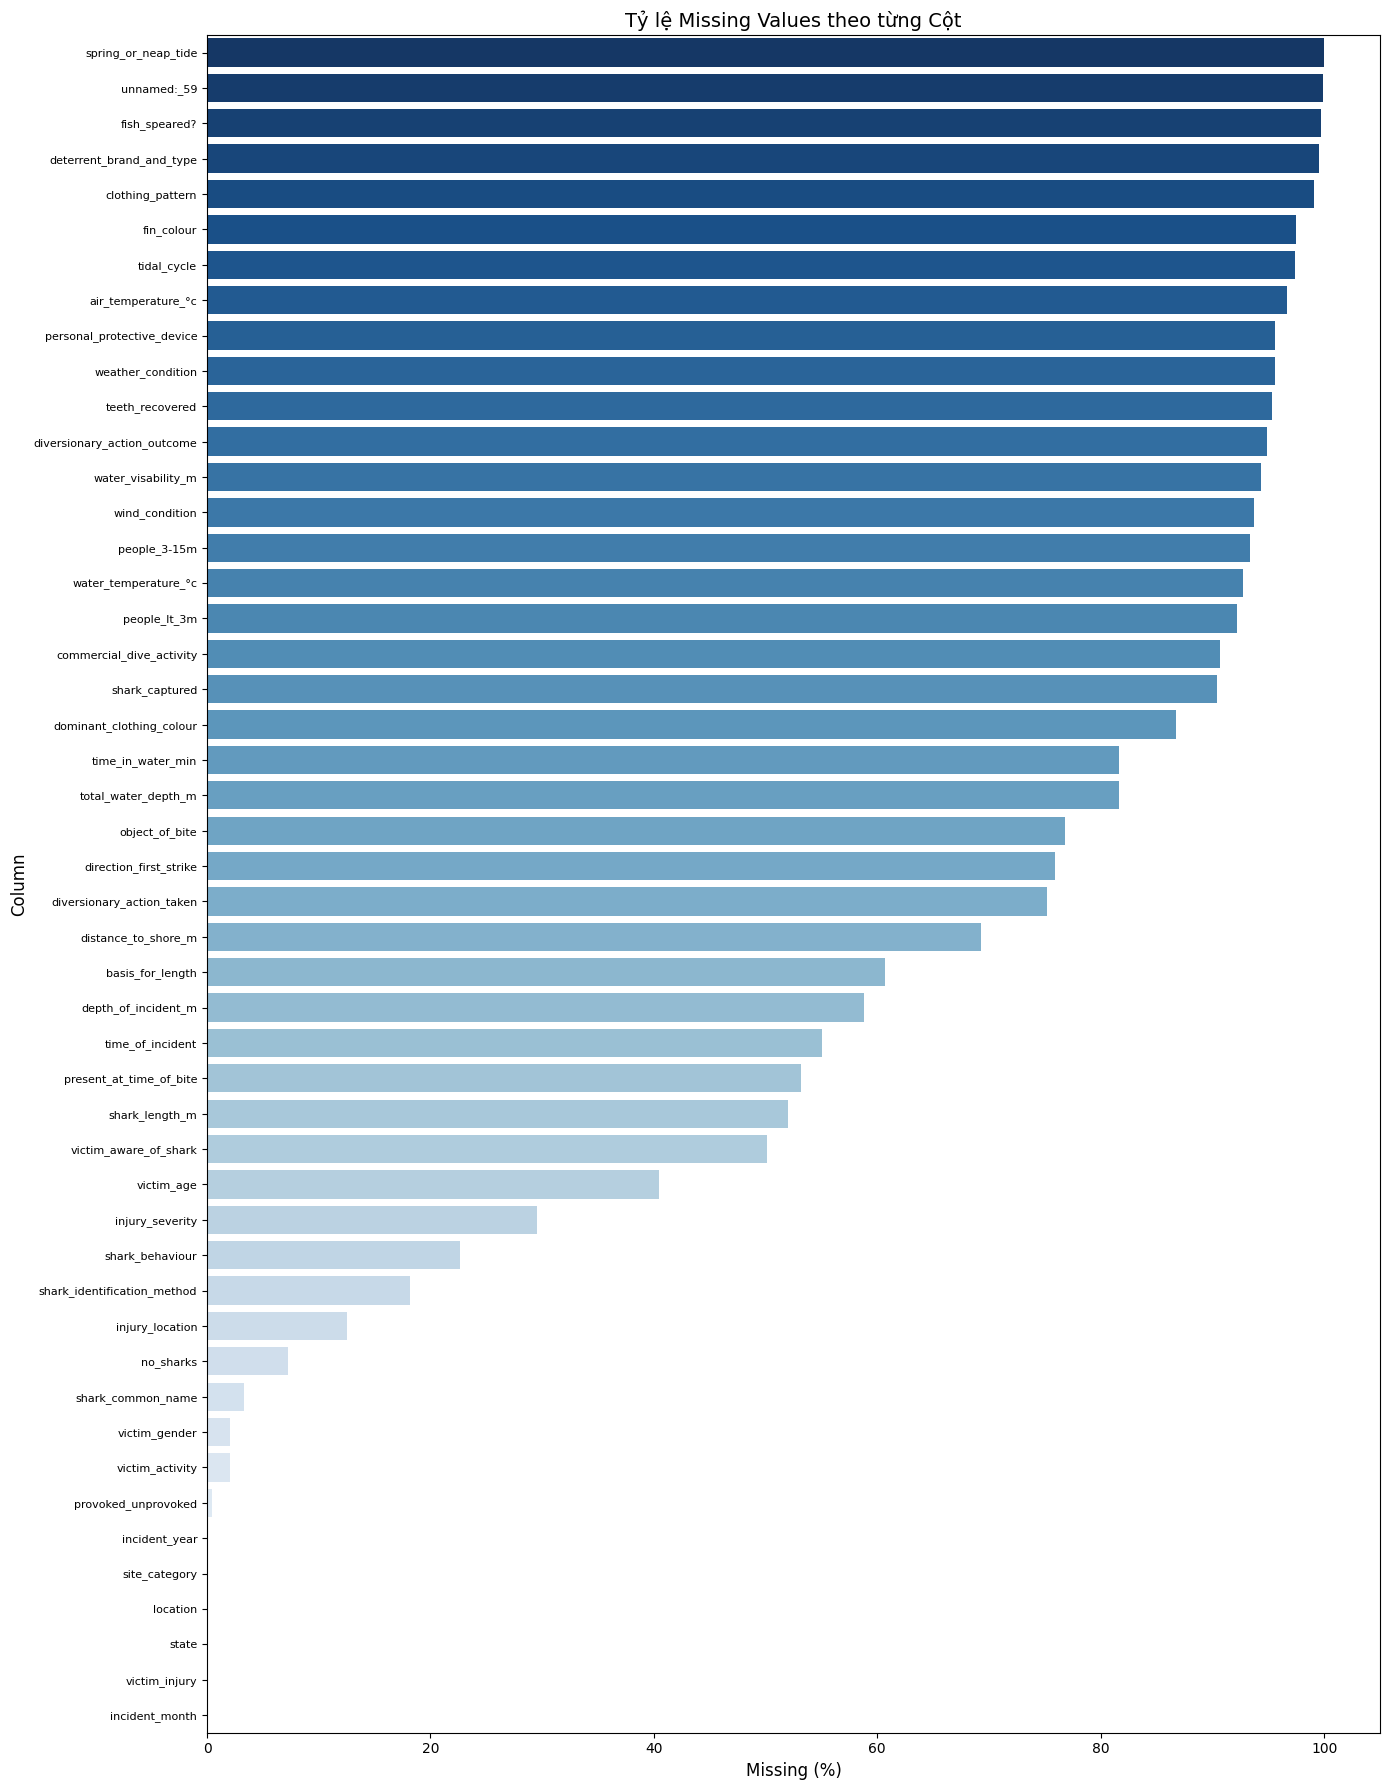

In [663]:
# Thống kê missing value

missing_summary = pd.DataFrame({
    "missing_count": df.isna().sum(),
    "missing_percent": (df.isna().mean()*100).round(2)
}).sort_values(by="missing_percent", ascending=False)

print("\nBảng tổng hợp missing values:\n")
print(missing_summary)

print("\nBar Chart Missing Values theo từng cột:")
plt.figure(figsize=(14,18)) 
sns.barplot(
    data=missing_summary.reset_index(),
    x="missing_percent", y="index", palette="Blues_r"
)
plt.xlabel("Missing (%)", fontsize=12)
plt.ylabel("Column", fontsize=12)
plt.yticks(fontsize=8)       
plt.title("Tỷ lệ Missing Values theo từng Cột", fontsize=14)
plt.tight_layout()
plt.show()

Giá trị thiếu trong bộ dữ liệu này chủ yếu phát sinh từ tính chất lịch sử, rời rạc của quá trình thu thập và khó khăn trong việc quan sát tại hiện trường.
Các cột thiếu nhiều thường thuộc loại text mô tả chi tiết, khó đo lường hoặc phân nhóm

In [664]:
# Các cột cần loại bỏ
cols_to_drop = [
    # Cột có quá nhiều giá trị missing (>99%)
    'fish_speared?',         
    'clothing_pattern',      
    'spring_or_neap_tide',  
    'deterrent_brand_and_type', 
    'unnamed:_59',               
]

df = df.drop(columns=cols_to_drop)

print(f"Đã loại bỏ {len(cols_to_drop)} cột.")
print("Các cột bị loại bỏ:")
print(cols_to_drop)
print(f"Kích thước data sau khi loại bỏ: {df.shape}")

Đã loại bỏ 5 cột.
Các cột bị loại bỏ:
['fish_speared?', 'clothing_pattern', 'spring_or_neap_tide', 'deterrent_brand_and_type', 'unnamed:_59']
Kích thước data sau khi loại bỏ: (1283, 43)


#### Vì sao chọn loại bỏ các cột có >99% missing thay vì xóa dòng?

- Các cột thiếu quá 99% dữ liệu không còn đủ thông tin để phân tích hay huấn luyện mô hình. Giữ lại chỉ làm tăng nhiễu và độ phức tạp.

- Nếu cố gắng giữ lại các cột này, ta gần như phải điền toàn bộ giá trị, khiến biến trở nên kém ý nghĩa và dễ gây sai lệch.

- Việc drop cột giúp giữ lại tối đa số dòng, nếu drop dòng thay vì drop cột thì sẽ làm mất dữ liệu quan sát.


In [665]:
# Xử lí missing values
num_cols = df.select_dtypes(include=['number']).columns.tolist()
invalid_numeric_cols = [
    c for c in num_cols
    if any(k in c.lower() for k in ["length", "age", "distance", 
                                       "total_water_depth", "visability", "people"])
]

# Chuyển âm thành NaN, 0 thành NaN (trừ depth_of_incident_m vì 0 được xem là trên mặt nước)
for c in invalid_numeric_cols:
    # Chuyển giá trị âm (< 0) thành NaN
    df.loc[df[c] < 0, c] = np.nan
    
    # Ngoại trừ 'depth_of_incident_m'
    if c.lower() != "depth_of_incident_m":
        df.loc[df[c] == 0, c] = np.nan

# Điền -1 cho tất cả các cột số
df[num_cols] = df[num_cols].fillna(-1)

# Điền 'unknown' cho tất cả các cột phân loại
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
df[cat_cols] = df[cat_cols].fillna("unknown")

#### Vì sao chọn cách thay giá trị này?

- Chọn thay missing value và các giá trị sai (âm hoặc bằng 0) của các cột số thành –1 và thay missing value của các cột phân loại thành “unknown” vì đây là dữ liệu ghi nhận thực tế. Nếu điền median hoặc mode sẽ tạo ra giá trị không có cơ sở và làm sai lệch dữ liệu gốc.

- Riêng cột depth_of_incident_m vẫn giữ giá trị 0 vì theo ngữ cảnh dữ liệu, 0 được xem là sự cố xảy ra ngay trên mặt nước hoặc sát bờ biển.

## 2.3. Numerical columns analysis

,mean,std,min,median,max
incident_month,5.915822,4.058937,1.0,5.00,12.0
incident_year,1970.664069,48.680308,1791.0,1989.00,2025.0
shark_length_m,2.682296,1.199854,0.3,2.60,6.0
no_sharks,1.032773,0.335359,1.0,1.00,10.0
victim_age,28.604194,14.253446,4.0,25.00,84.0
people_lt_3m,1.655914,1.542828,1.0,1.00,12.0
people_3-15m,3.273810,5.477998,1.0,2.00,40.0
time_of_incident,1278.057192,410.040299,130.0,1300.00,2330.0
depth_of_incident_m,2.193939,5.510993,0.0,0.00,45.0
time_in_water_min,59.725000,250.521424,0.1,10.00,2160.0


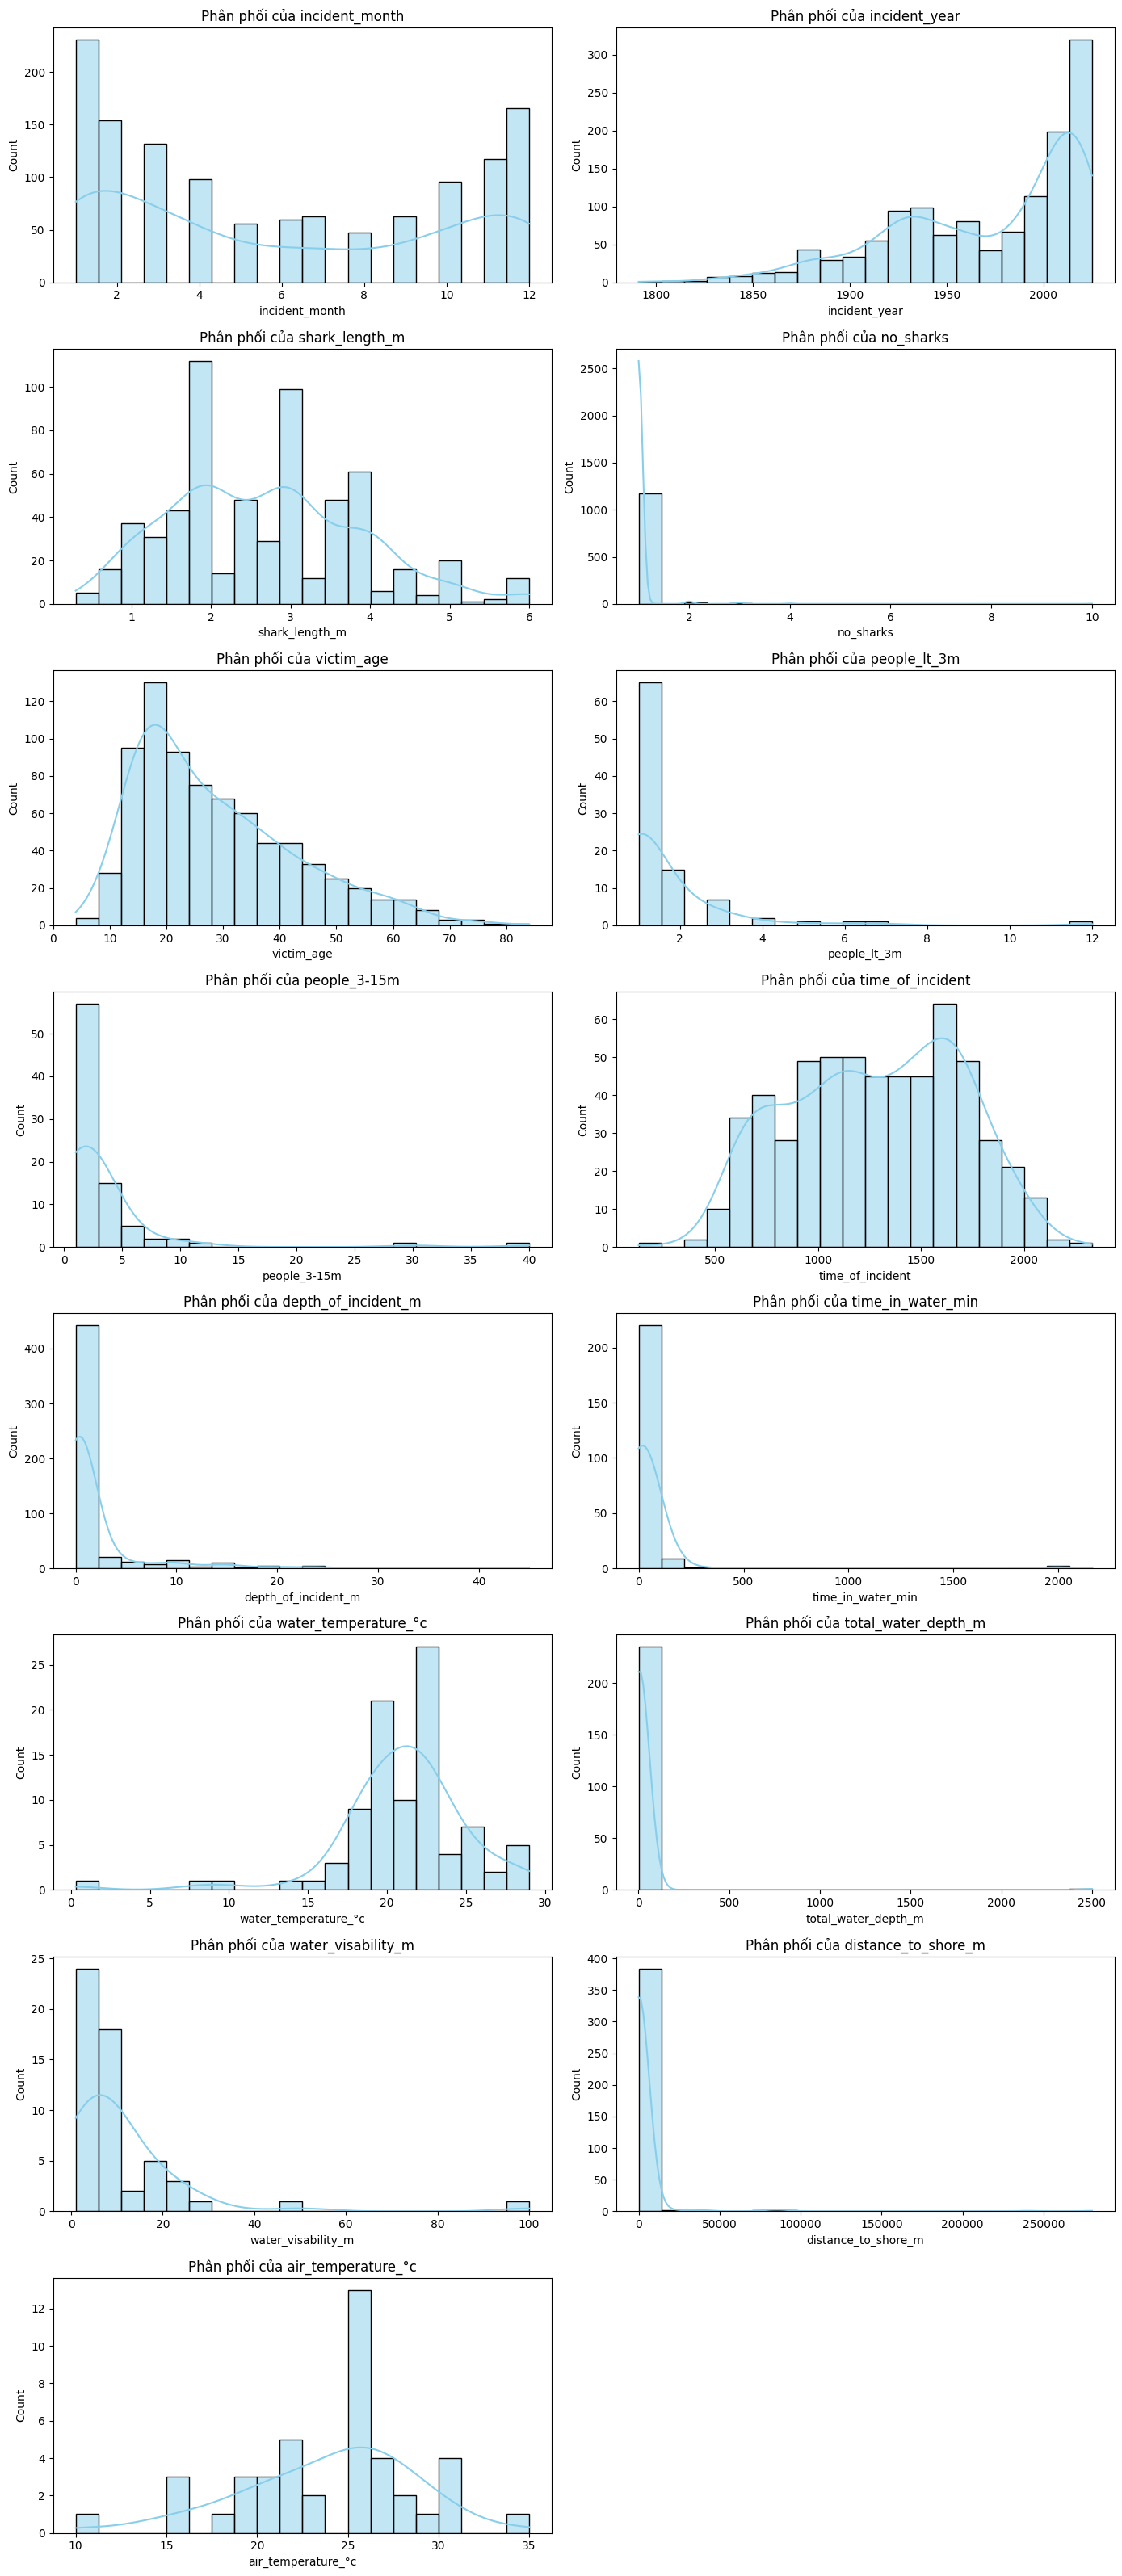

In [666]:
# Thống kê mô tả
stats_num_df = df[num_cols].replace(-1, np.nan).describe().transpose()
stats_num_df = stats_num_df[['mean','std','min','50%','max']]
stats_num_df.rename(columns={'50%':'median'}, inplace=True)
display(stats_num_df)

# Trực quan hóa 2 hình trên 1 dòng
n_cols = 2
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # ceil(len/2)
plt.figure(figsize=(14, n_rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    data_valid = df[col][df[col] != -1].dropna()
    if data_valid.empty:
        plt.title(f'Không có dữ liệu hợp lệ cho {col}')
        continue
    sns.histplot(data_valid, kde=True, bins=20, color='skyblue')
    plt.title(f'Phân phối của {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [667]:
# Phân tích outlier

def detect_outliers(series):
    s = series[series != -1]  # bỏ -1 ra khỏi dữ liệu (các tường hợp missing được xử lí)
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    out = s[(s < lower) | (s > upper)]
    return (len(out), len(out)/len(s)*100, s.min(), s.max(), lower, upper)

result = []
for col in df.select_dtypes(include=np.number).columns:
    count, rate, minv, maxv, low, up = detect_outliers(df[col])
    result.append([col, count, rate, minv, maxv, low, up])

outlier_df = pd.DataFrame(result, columns=[
    " Cột ", " Số lượng outlier ", " Tỷ lệ % ", 
    " Min ", " Max ", " Ngưỡng dưới ", " Ngưỡng trên "
])

print("Thống kê outlier:")
display(outlier_df)

Thống kê outlier:


,Cột,Số lượng outlier,Tỷ lệ %,Min,Max,Ngưỡng dưới,Ngưỡng trên
0,incident_month,0,0.000000,1.0,12.0,-10.000,22.000
1,incident_year,3,0.233827,1791.0,2025.0,1815.500,2131.500
2,shark_length_m,0,0.000000,0.3,6.0,-0.750,6.050
3,no_sharks,21,1.764706,1.0,10.0,1.000,1.000
4,victim_age,8,1.048493,4.0,84.0,-13.000,67.000
5,people_lt_3m,6,6.451613,1.0,12.0,-0.500,3.500
6,people_3-15m,7,8.333333,1.0,40.0,-2.000,6.000
7,time_of_incident,0,0.000000,130.0,2330.0,-105.000,2655.000
8,depth_of_incident_m,83,15.719697,0.0,45.0,-1.500,2.500
9,time_in_water_min,24,10.169492,0.1,2160.0,-37.500,70.500


#### Nhận xét

1. Các cột số ổn định, ít hoặc không có outlier

    - incident_month, incident_year, shark_length_m, time_of_incident, air_temperature_°c: hầu như không có outlier hoặc rất ít, dữ liệu hợp lý, đáng tin cậy để phân tích.

    - Chiều dài cá mập (shark_length_m) có Mean ≈ 2.68 m, Median ≈ 2.6 m, Min = 0.3 m, Max = 6.1 m, phân bố khá cân bằng, phản ánh chủ yếu cá mập trưởng thành.

2. Các cột phản ánh tình huống thực tế

    - victim_age: 8 outlier (~1%), gồm cả trẻ nhỏ (4 tuổi) và người già (84 tuổi), phản ánh các nạn nhân hiếm gặp. Median = 25, Mean = 28.6, phân bố lệch phải, chủ yếu nạn nhân ở nhóm thanh niên/người trẻ tuổi.

    - depth_of_incident_m: 83 outlier (~15.7%), chủ yếu là vụ việc ở vùng nước rất nông hoặc sâu bất thường. Median = 0 m, Mean = 2.19 m, hầu hết các vụ tấn công xảy ra ở vùng nước nông, gần bờ.

    - time_in_water_min: 24 outlier (~10%), phản ánh nạn nhân ở lại trong nước quá lâu hoặc rất ngắn.

    - distance_to_shore_m: có outlier lớn (Max ≈ 280 km), Median = 80 m, Mean ≈ 2925 m, hầu hết vụ tấn công xảy ra gần bờ nhưng vẫn tồn tại các vụ biệt lập xa bờ.

    - total_water_depth_m, no_sharks, people_lt_3m, people_3-15m, water_temperature_°c, water_visability_m: các outlier phần lớn xuất hiện trong những tình huống hiếm.

    - Nhiệt độ nước (water_temperature_°c): phân bố cân bằng, Median ≈ 21°C, Mean ≈ 21.01°C, phần lớn các vụ xảy ra trong điều kiện nước ôn hòa/mát.

##### Quyết định xử lý:

- Không loại outlier trong hầu hết các cột vì nhiều trường hợp phản ánh tình huống thực tế của sự kiện tấn công cá mập.

- Các cột như distance_to_shore_m, latitude, depth_of_incident_m, time_in_water_min, total_water_depth_m giữ nguyên giá trị outlier vì phản ánh các tình huống thực tế hiếm gặp, cần thiết cho phân tích hành vi và bối cảnh tấn công.

## 2.4. Categorical columns analysis

In [668]:
# Chuẩn hóa text
for col in cat_cols:
    df[col] = df[col].str.lower().str.strip()

# Bảng thống kê chung cho tất cả cột phân loại
summary_list = []
for col in cat_cols:
    df_valid = df[df[col] != 'unknown']
    value_counts = df_valid[col].value_counts(normalize=True).head(5) * 100
    top_values = ", ".join([f"{idx} ({v:.1f}%)" for idx, v in value_counts.items()])
    summary_list.append({
        "Cột": col,
        "Số giá trị trong cột": df[col].nunique(),
        "Top 5 giá trị xuất hiện nhiều nhất": top_values
    })
summary_cat_df = pd.DataFrame(summary_list)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', None)
display(summary_cat_df)

,Cột,Số giá trị trong cột,Top 5 giá trị xuất hiện nhiều nhất
0,victim_injury,5,"injured (60.6%), fatal (20.2%), uninjured (19.1%), injury (0.1%)"
1,state,7,"nsw (35.9%), qld (29.4%), wa (18.9%), sa (6.5%), vic (5.7%)"
2,location,893,"torres strait, unknown location (1.2%), townsville, ross creek (0.8%), sydney, maroubra beach (0.8%), torres strait, badu island (0.6%), moreton bay (0.5%)"
3,site_category,8,"coastal (65.8%), island open ocean (14.4%), estuary/harbour (8.0%), river (7.5%), ocean/pelagic (4.1%)"
4,shark_common_name,27,"white shark (31.3%), tiger shark (19.2%), wobbegong (17.6%), bull shark (17.3%), whaler shark (6.4%)"
5,shark_identification_method,34,"bite analysis, shark behaviour, geographical location (25.0%), direct observation (21.4%), bite analysis, shark behaviour, geographical location, direct observation (16.8%), bite analysis (9.1%), bite analysis, shark behaviour (8.5%)"
6,basis_for_length,23,"witness/victim (65.7%), other: media report (8.9%), government official (6.5%), bite radius estimation (6.3%), other: measured captured shark (3.8%)"
7,provoked_unprovoked,3,"unprovoked (67.2%), provoked (32.8%)"
8,victim_activity,28,"swimming (37.4%), boarding (22.4%), spearfishing (10.5%), snorkelling (10.4%), diving (7.2%)"
9,commercial_dive_activity,4,"y (98.3%), board (0.8%), n (0.8%)"


#### Nhận xét
(chú ý: không xét các giá trị unknown)

Dữ liệu còn tổng cộng 27 biến phân loại sau khi lọc, các biến này có sự đa dạng lớn về số lượng giá trị unique. Một số phân bố cho thấy sự mất cân bằng lớn hoặc đáng chú ý chẳng hạn như:

- Nạn nhân chủ yếu là nam (89.5%), tỉ lệ nữ rất thấp: cho thấy mức độ tiếp xúc với cá mập ngoài biển của nam cao hơn.

- Đa số các vụ tấn công thuộc loại unprovoked (67.2%): phần lớn không phải do tác động hay kích thích từ con người.

- Kết quả thương tích nghiêm trọng chiếm tỉ lệ cao nhất (60.6%), tử vong chỉ khoảng 20.2%: phần lớn nạn nhân sống sót sau sự cố.

- Môi trường xảy ra vụ việc thường là ven biển (coastal) với 65.8%.

- Hoạt động trước khi bị tấn công chủ yếu là swimming (37.4%) và boarding (22.4%),... đây là các hoạt động cần được cảnh báo.

- Loài cá mập phổ biến nhất là white shark (31.3%), tiếp theo là tiger shark (19.2%) và wobbegong (17.6%): phân bố loài không đồng đều, có tính đặc trưng khu vực.

- Vị trí chấn thương thường gặp nhất là chân (20.4%).

- Thời tiết khi xảy ra sự cố thường là overcast (42.1%) hoặc sunny (38.6%).

## 2.5. Relationships & correlations

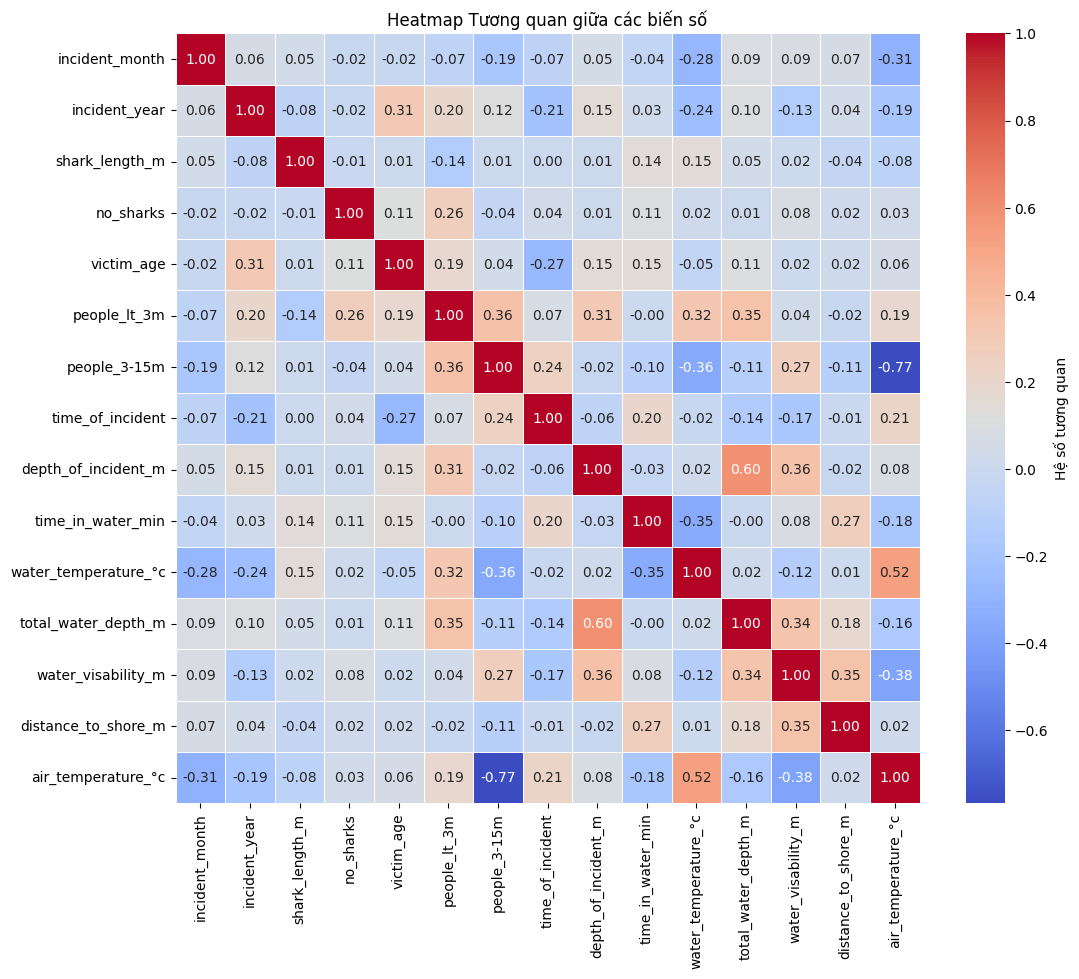

In [669]:
# loại biến hầu hết là -1
valid_num_cols = [c for c in num_cols if (df[c] != -1).sum() > 10]
corr_matrix = df[valid_num_cols].replace(-1, np.nan).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=.5,
    cbar_kws={'label': 'Hệ số tương quan'}
)
plt.title('Heatmap Tương quan giữa các biến số')
plt.show()

#### Nhận xét:

Các Mối Tương Quan Mạnh: $|r| \ge 0.5$)
- people_3-15m và air_temperature_°c (r = -0.77)
    - Tương quan âm rất mạnh (mối quan hệ mạnh nhất trong tập dữ liệu).
    - Khi nhiệt độ không khí tăng cao, số lượng người ở khu vực gần bờ (3–15 mét) lại có xu hướng giảm xuống. Điều này đi ngược lại trực giác thông thường (trời nóng thì đông người xuống biển hơn). 

Các Biến Tương Quan Yếu: Hầu hết các biến khác đều có tương quan yếu ($|r| < 0.2$), đặc biệt là các biến liên quan trực tiếp đến sinh vật học và độ sâu chính xác của sự cố như:
- shark_length_m: Tương quan gần bằng 0 với hầu hết các yếu tố môi trường và hành vi, kích thước của cá mập được ghi nhận không liên quan tuyến tính đến các biến khác.
- victim_age: Có tương quan yếu với tất cả các biến số khác, tuổi của nạn nhân không liên quan nhiều đến các yếu tố môi trường hay hành vi.
- no_sharks: Tương quan yếu, cho thấy phần lớn các sự cố được ghi nhận là các cuộc tấn công đơn lẻ, không liên quan trực tiếp đến số lượng cá mập được quan sát trong khu vực lân cận.

Kết luận: hầu hết các yếu tố không có tương quan mạnh mẽ với nhau, cho thấy các sự kiện xảy ra có xu hướng ngẫu nhiên, đơn lẻ.

In [670]:
# Lưu dữ liệu đã xử lý
out_dir = "data/processed"
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "SharkIncident_processed.csv")
df.to_csv(out_path, index=False)

## 2.6. Initial observations & insights

### 2.6.1. Key observations

- Nạn nhân & hành vi: Chủ yếu nam (~90%), trung bình 28 tuổi; hoạt động phổ biến dẫn đến sự cố: bơi lội và lướt ván.

- Mức độ nghiêm trọng: Tỷ lệ tử vong ~20%, bị thương ~60%.

- Loài & vị trí: White, Tiger, Bull shark; tập trung ven biển (65.8%), NSW/QLD/WA.

- Phát hiện khác: Nhiệt độ tăng → ít người ở vùng nước nông (r = -0.77).

### 2.6.2. Data quality issues

- Missing data: Thiếu nhiều ở time_in_water_min, distance_to_shore_m, total_water_depth_m; các biến chi tiết như clothing_pattern gần như trống.

- Định dạng & nhất quán: Cần ép kiểu số, chuẩn hóa text (lowercase, xóa khoảng trắng).

### 2.6.3. Preprocessing steps

- Loại bỏ cột tỷ lệ missing >99% hoặc không cần thiết.

- Điền khuyết: -1 (số), "unknown" (phân loại).

- Làm sạch: xử lý giá trị âm/0 vô lý.

- Chuẩn hóa text.

### 2.6.4. Limitations

Missing data & outliers: Thiếu dữ liệu nhiều cột là các text mô tả chi tiết; một số outlier đặc biệt phản ánh tình huống cá biệt.

Biases: có thể bị bias do thiên kiến của báo cáo lịch sử, nhân chứng phóng đại kích thước, nhiều loài chưa xác định, .v.v

# 3. QUESTION FORMULATION

## 3.1. Xu hướng phân bố các vụ tấn công cá mập tại Úc thay đổi như thế nào theo thời gian và không gian?

a. Mục đích: xác định xem sự gia tăng các vụ tấn công là do sự mở rộng hoạt động của con người sang các vùng biển mới hay do thay đổi hành vi của cá mập theo mùa

b. Lợi ích:
- Cung cấp cái nhìn tổng quan để dự báo các khu vực rủi ro cao trong tương lai
- Hỗ trợ phân bổ nguồn lực cứu hộ và đưa ra cảnh báo du lịch chính xác hơn theo từng vùng và thời điểm trong năm.

c. Những người sẽ quan tâm: chính quyền địa phương, các cơ quan quản lý du lịch và an toàn biển, người đi biển, v.v.

## 3.2. Có mối liên hệ nào giữa loài cá mập và mức độ nghiêm trọng của chấn thương không?

a. Mục đích: xác định mức độ nguy hiểm thực tế của từng loài

b. Lợi ích:
- Giúp phân loại rủi ro dựa trên loài cá mập được phát hiện tại khu vực
- Cung cấp thông tin để chuẩn bị phương án sơ cấp cứu phù hợp

c. Những đối tượng sẽ quan tâm: các nhà sinh vật học biển, nhân viên y tế cấp cứu, công chúng, v.v.

## 3.3. Độ sâu tại vị trí xảy ra sự cố ảnh hưởng như thế nào kiểu hành vi tấn công của cá mập?

a. Mục đích: hiểu rõ chiến thuật săn mồi của cá mập trong các môi trường độ sâu khác nhau

b. Lợi ích:
- Giúp người dân nhận biết rủi ro tiềm ẩn khi hoạt động ở các độ sâu khác nhau
- Đưa ra khuyến cáo an toàn cụ thể cho người bơi, thợ lặn

c. Những đối tượng sẽ quan tâm: thợ lặn, người lướt sóng, các nhà nghiên cứu hành vi động vật, v.v.

## 3.4 Liệu độ tuổi và giới tính của nạn nhân có ảnh hưởng đến khả năng bị tấn công bởi các loài cá mập cụ thể không?

a. Mục đích: tìm hiểu xem liệu các loài cá mập khác nhau có xu hướng "chọn" mục tiêu dựa trên kích thước (liên quan đến tuổi) hoặc hành vi đặc thù của nhóm nhân khẩu học hay không

b. Lợi ích: 
- Phát hiện các nhóm đối tượng dễ bị tổn thương nhất
- Đưa ra các cảnh báo cụ thể cho các nhóm nhân khẩu tại các vùng biển có loài cá mập đặc thù

c. Những đối tượng sẽ quan tâm: các cơ quan an toàn biển, nhà nghiên cứu, ngành du lịch biển, người đi biển, v.v.

## 3.5. Những yếu tố nào có ảnh hưởng tương đối lớn hơn đến mức độ nghiêm trọng của các vụ tấn công cá mập tại Úc?
a. Mục đích: xác định các yếu tố (liên quan đến cá mập, hành vi con người và đặc điểm nạn nhân) có ảnh hưởng lớn nhất đến khả năng gây thương tích nghiêm trọng hoặc tử vong trong các vụ tấn công cá mập.

b. Lợi ích:

- Hỗ trợ xây dựng các khuyến cáo và chương trình tuyên truyền an toàn biển hiệu quả hơn.
- Giúp giảm thiểu các vụ tấn công nghiêm trọng do hành vi nguy hiểm của con người.
- Làm cơ sở lựa chọn các biến quan trọng cho bước phân cụm và phân tích sâu hơn.

c. Những đối tượng sẽ quan tâm: Cơ quan quản lý an toàn biển, đơn vị tuyên truyền cộng đồng và các nhà nghiên cứu hành vi con người – động vật.

## 3.6 Có thể phân nhóm các vụ tấn công thành các mẫu hình (patterns) riêng biệt dựa trên sự kết hợp của nhiều yếu tố (như vị trí, độ sâu, hoạt động, loài cá mập, ...) không?

a. Mục đích: tìm thấy pattern xuất hiện vụ tấn công 

b. Lợi ích
- Phát hiện ra các xu hướng tấn công điển hình (ví dụ: Nhóm "Tấn công vùng nước sâu - Cá mập trắng - Thợ lặn")
- Xây dựng các chiến lược phòng ngừa rủi ro toàn diện và hiệu quả hơn dựa trên các kịch bản tấn công thực tế

c. Những đối tượng sẽ quan tâm: các nhà khoa học dữ liệu, cơ quan an toàn biển, người đi biển, công chúng, v.v.

# 4. DATA ANALYSIS

## 4.1. Xu hướng phân bố các vụ tấn công cá mập tại Úc thay đổi như thế nào theo thời gian và không gian?

In [671]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [672]:
df = pd.read_csv("data/processed/SharkIncident_processed.csv")

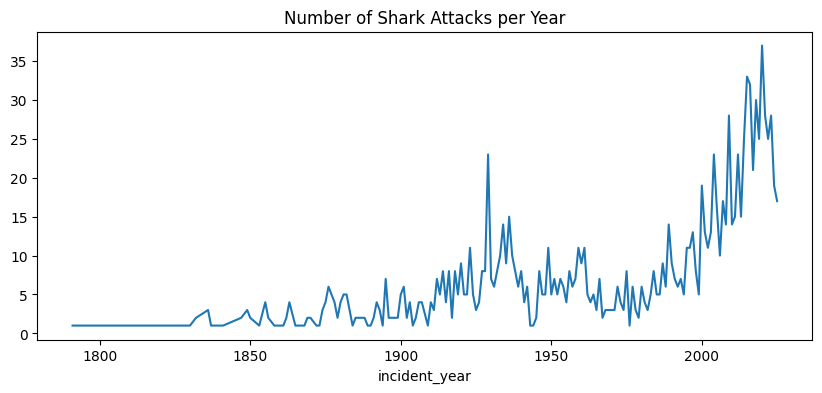

In [ ]:
# tiến hành gom các vụ tấn công theo từng năm 
df.groupby("incident_year").size().plot(kind="line", figsize=(10,4), title="Number of Shark Attacks per Year");

- Biểu đồ cho thấy số vụ tấn công cá mập tăng rõ rệt từ cuối thế kỷ 19, đặc biệt sau năm 1900, gắn liền với sự phát triển của du lịch biển và các hoạt động dưới nước. 
- Trước thế kỷ 19, số vụ được ghi nhận rất thấp, nhiều khả năng do hạn chế trong việc thu thập và báo cáo dữ liệu. 
- Mặc dù có biến động theo từng năm, xu hướng chung vẫn là gia tăng, khả năng cao là do mức độ tiếp cận ngày càng lớn của con người với môi trường sống của cá mập.

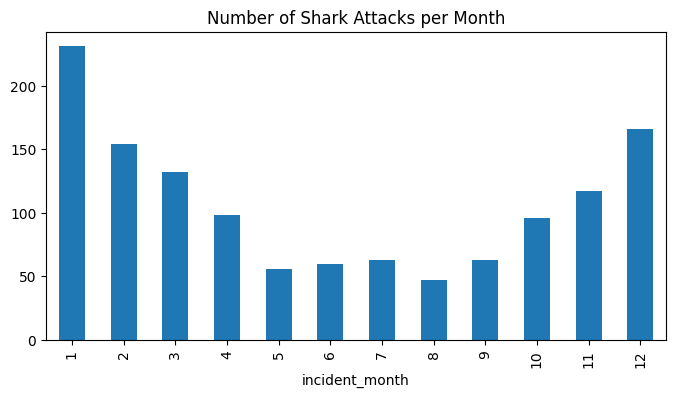

In [674]:
df.groupby("incident_month").size().plot(kind="bar", figsize=(8,4), title="Number of Shark Attacks per Month");


Số vụ tấn công cá mập biến động rõ rệt theo các tháng trong năm, với đỉnh cao vào tháng 11, 12, 1 và 2, trong khi các tháng giữa năm như tháng 5, 6, 7 và 8 ghi nhận số vụ thấp hơn. Điều này trùng với mùa du lịch cao điểm, đặc biệt tại Úc, nơi tháng 11 đến tháng 2 thuộc mùa hè, khi các hoạt động dưới nước gia tăng mạnh. 
**=> Sự gia tăng các vụ tấn công trong giai đoạn này phản ánh mối liên hệ giữa du lịch biển và mức độ tiếp cận ngày càng lớn của con người với môi trường sống của cá mập**.

In [ ]:
# phân tích các vụ tấn công theo giờ trong ngày
# tiến hành loại bỏ các giá trị -1 tức là giá trị thiếu trong data và chuyển sang kiểu int
valid_time = df[df["time_of_incident"] != -1]["time_of_incident"].astype(int)
# data về "time of incident" có dạng 1750 tức là 17h50 nên chia cho 100 để lấy được giờ
hours = valid_time // 100  

In [ ]:
# chia thời gian trong ngày thành 4 khoảng 
bins = [0, 6, 12, 18, 24]
labels = ["0h-6h", "6h-12h", "12h-18h", "18h-24h"]
time_period = pd.cut(hours, bins=bins, labels=labels, right=False)


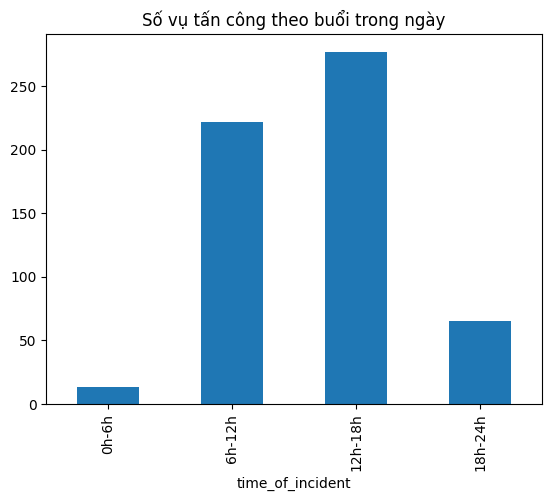

In [677]:
time_period.value_counts().sort_index().plot(
    kind="bar",
    title="Số vụ tấn công theo buổi trong ngày"
);

- Biểu đồ cho thấy số vụ tấn công cá mập phân bố không đồng đều theo thời gian trong ngày. 
- Các vụ việc xảy ra chủ yếu vào ban ngày, đặc biệt là trong khung giờ 12h–18h, nơi ghi nhận số vụ cao nhất, tiếp theo là 6h–12h. Ngược lại, số vụ tấn công trong khoảng 0h–6h là rất thấp, và giảm đáng kể vào buổi tối (18h–24h).
- Xu hướng này cho thấy mối liên hệ rõ rệt giữa thời điểm xảy ra tai nạn và mức độ hoạt động của con người dưới nước, khi các hoạt động như bơi lội, lướt sóng và du lịch biển tập trung chủ yếu vào ban ngày.

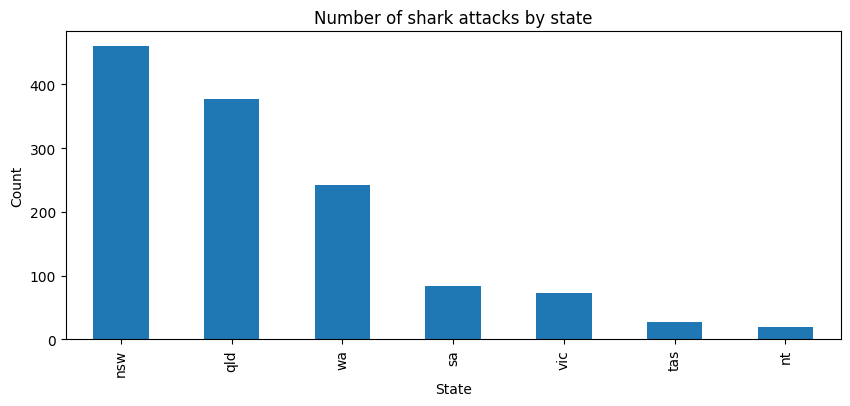

In [ ]:
# xét theo bang (state)
df['state'].value_counts().plot(kind="bar", figsize=(10,4))
plt.title("Number of shark attacks by state")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

- Biểu đồ cho thấy các vụ tấn công cá mập ở Úc chủ yếu tập trung tại New South Wales (NSW), Queensland (QLD) và Western Australia (WA), trong đó NSW ghi nhận số vụ cao nhất. Ngược lại, South Australia (SA), Victoria (VIC), Tasmania (TAS) và Northern Territory (NT) có số vụ thấp hơn đáng kể. 
- Có thể là do các bang ven biển phía đông và phía tây có hoạt động du lịch biển sôi động hơn, đường bờ biển dài hơn, cùng với điều kiện khí hậu và môi trường sinh thái thuận lợi cho cá mập sinh sống, nên số vụ tấn công được ghi nhận cao hơn so với các bang còn lại.

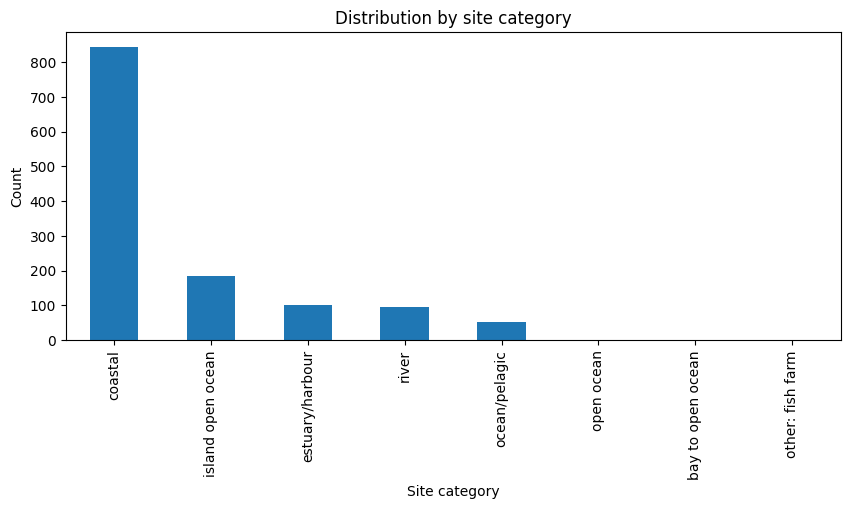

In [ ]:
# xét theo vị trí xảy ra các vụ tấn công
df['site_category'].value_counts().plot(kind='bar', figsize=(10,4))
plt.title("Distribution by site category")
plt.xlabel("Site category")
plt.ylabel("Count")
plt.show()


- Biểu đồ thể hiện sự phân bố số vụ tấn công cá mập tại Úc theo loại khu vực, trong đó khu vực ven biển chiếm tỷ lệ áp đảo với hơn 800 vụ được ghi nhận.
- Các khu vực như đảo ngoài đại dương, cửa sông/đầm phá, sông và biển khơi có số vụ tấn công thấp hơn đáng kể.
- Đại dương mở và các khu vực vịnh thông ra đại dương và khu vực trại cá ghi nhận rất ít trường hợp.
- Kết quả này cho thấy mức độ tương tác giữa con người và cá mập cao nhất tại các vùng ven biển, nơi tập trung nhiều hoạt động giải trí và kinh tế biển, trong khi các khu vực ít chịu tác động của con người có tần suất tấn công thấp hơn.

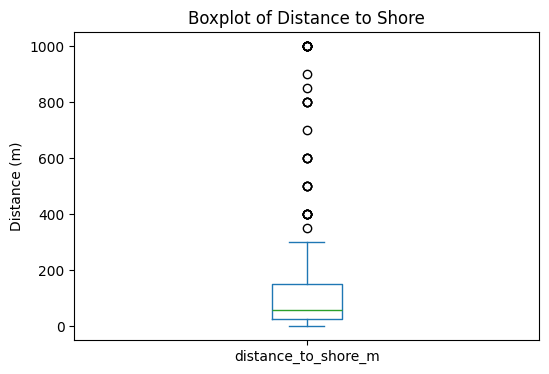

In [ ]:
# xét theo khaorng cách so với bờ
filtered = df[
    (df['distance_to_shore_m'] <= 1000) &
    (df['distance_to_shore_m'] >= 0)     # loại -1 là các giá trị bị miss
]

filtered['distance_to_shore_m'].dropna().plot(
    kind='box',
    figsize=(6,4)
)

plt.title("Boxplot of Distance to Shore")
plt.ylabel("Distance (m)")
plt.show()


- Biểu đồ boxplot cho thấy khoảng cách từ bờ biển nơi xảy ra các vụ việc chủ yếu tập trung ở mức rất gần bờ, với trung vị chỉ khoảng vài chục mét. 
- Phần lớn các quan sát nằm dưới 150 m, trong khi xuất hiện nhiều giá trị ngoại lai ở khoảng cách xa hơn >300 m. Điều này cho thấy các vụ việc xảy ra chủ yếu gần bờ, nhưng vẫn có một số trường hợp hiếm gặp xảy ra ở khu vực xa bờ hơn.

### KẾT LUẬN
- Kết quả phân tích cho thấy số vụ tấn công cá mập có mối liên hệ chặt chẽ với sự gia tăng các hoạt động du lịch và giải trí dưới nước, đặc biệt trong các tháng cao điểm của mùa hè.
- Các vụ việc chủ yếu xảy ra tại khu vực ven biển và trong khung giờ từ trưa đến chiều, trùng với thời điểm con người tham gia các hoạt động dưới nước nhiều nhất.
- Khoảng cách gần bờ cùng với các điều kiện môi trường thuận lợi cho cá mập sinh sống làm gia tăng khả năng tương tác giữa người và cá mập.
- Do đó, có thể kết luận rằng mức độ hiện diện và hoạt động của con người trong môi trường biển đóng vai trò quan trọng trong việc làm tăng tần suất các vụ tấn công cá mập được ghi nhận

## 4.2. Có mối liên hệ nào giữa loài cá mập và mức độ nghiêm trọng của chấn thương không?

### Câu hỏi nhỏ
- Trong bộ dữ liệu có các feature như sau : "injury_location", "object_of_bite", "shark_common_name", "victim_injury", "no_shark"
- Từ các dữ liệu này tiến hành đặt ra câu hỏi nhỏ:
    * Mỗi loài cá mập gây ra bao nhiêu vụ tử vong và tổng số vụ tấn công liên quan đến loài đó là bao nhiêu?
    * Số lượng cá mập tham gia trong một vụ tấn công (no_shark) có làm gia tăng mức độ nghiêm trọng của chấn thương hoặc ảnh hưởng đến đối tượng bị cắn (object_of_bite) hay không? 

In [ ]:
# Loại bỏ các hàng có giá trị 'unknown' trong cột 'shark_common_name'
df_clean = df[df['shark_common_name'] != 'unknown'].copy()

# tổng số vụ tấn công cho mỗi loài
total_attacks = (
    df_clean
    .groupby('shark_common_name')
    .size()
    .reset_index(name='Total_Attacks')
)

# tổng số vụ tử vong trong đó
fatal_attacks =(
    df_clean[
        (df_clean['victim_injury'] == 'fatal')|
                  (df_clean['victim_injury'] == 'injured')
        ]
    .groupby('shark_common_name')
    .size()
    .reset_index(name='Total_Fatal_Injured')
)
# gộp dữ liệu lại
summary_table = (
    total_attacks
    .merge(fatal_attacks, on='shark_common_name', how='left')
    .fillna(0)
)

summary_table['Total_Fatal_Injured'] = summary_table['Total_Fatal_Injured'].astype(int)

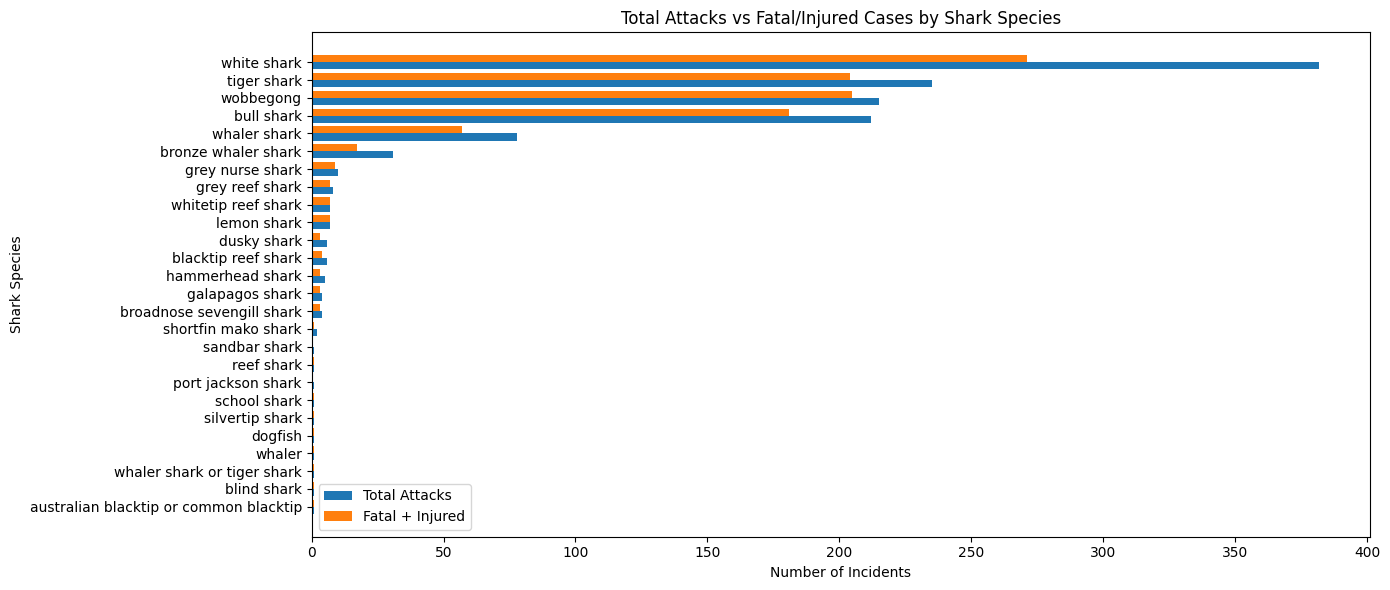

In [ ]:
summary_sorted = summary_table.sort_values(by='Total_Attacks', ascending=True)

x = np.arange(len(summary_sorted))
width = 0.4

plt.figure(figsize=(14, 6))

plt.barh(x - width/2, summary_sorted['Total_Attacks'], height=width, label='Total Attacks')
plt.barh(x + width/2, summary_sorted['Total_Fatal_Injured'], height=width, label='Fatal + Injured')

plt.yticks(x, summary_sorted['shark_common_name'])
plt.ylabel("Shark Species")
plt.xlabel("Number of Incidents")
plt.title("Total Attacks vs Fatal/Injured Cases by Shark Species")
plt.legend()

plt.tight_layout()
plt.show()

- Biểu đồ cho thấy sự khác biệt rõ rệt về mức độ rủi ro giữa các loài cá mập. 
- White shark, tiger shark và bull shark không chỉ có số vụ tấn công cao nhất mà còn chiếm phần lớn các ca tử vong và bị thương, cho thấy đây là những loài có mức độ nguy hiểm thực tế cao đối với con người. 
- Ngược lại, nhiều loài khác như shortfin mako shark, dusky shark hay hammerhead shark có tần suất tấn công rất thấp và hầu như không gây thương tích nghiêm trọng, phản ánh mức rủi ro hạn chế. 
- Kết quả này cho thấy nguy cơ từ cá mập không phân bố đồng đều giữa các loài, và việc đánh giá mức độ nguy hiểm cần dựa trên loài cụ thể thay vì coi cá mập như một nhóm đồng nhất.

In [ ]:
# xét xem số lượng cá mập có ảnh hưởng gì đến tình trạng chấn thương của nạn nhân
# loại bỏ các giá trị -1 tức là các giá trị missing
filtered_df = df[df['no_sharks'] != -1].copy()

# chia thành 2 nhóm: nhóm cá mập đơn lẻ (1 con) và nhóm nhiều cá mập (>1) để so sánh 
filtered_df['shark_group'] = filtered_df['no_sharks'].apply(
    lambda x: '1 shark' if x == 1 else '>1 sharks'
)

In [ ]:
# gom nhóm theo nhóm cá mập và mức độ vết thương
injury_counts = (
    filtered_df
    .groupby(['shark_group', 'victim_injury'])
    .size()
    .unstack(fill_value=0)
)

# Chuyển sang tỷ lệ %
injury_percent = injury_counts.div(injury_counts.sum(axis=1), axis=0) * 100


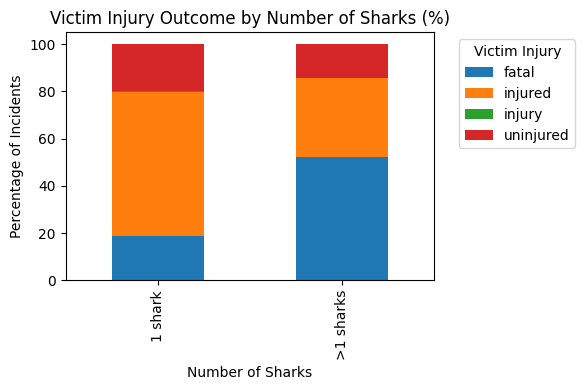

In [ ]:
injury_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4),
    color = ['#C62828', '#FBC02D', '#1565C0', '#2E7D32']
)


plt.title("Victim Injury Outcome by Number of Sharks (%)")
plt.xlabel("Number of Sharks")
plt.ylabel("Percentage of Incidents")
plt.legend(title="Victim Injury", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


- Biểu đồ cho thấy trong các sự cố chỉ có 1 cá mập, tỷ lệ nạn nhân bị thương nhưng không tử vong chiếm ưu thế (khoảng 60%), trong khi tỷ lệ tử vong tương đối thấp (khoảng 20%). Ngược lại, ở các sự cố có nhiều hơn 1 cá mập, tỷ lệ tử vong tăng mạnh (trên 50%), đồng thời tỷ lệ bị thương giảm đáng kể. Tỷ lệ không bị thương trong cả hai trường hợp tương đối ổn định và ở mức thấp.
- Điều này cho thấy số lượng cá mập tham gia có mối liên hệ rõ ràng với mức độ nghiêm trọng của hậu quả; sự xuất hiện của nhiều cá mập làm tăng đáng kể nguy cơ tử vong, cho thấy yếu tố “quy mô tấn công” đóng vai trò quan trọng hơn trong việc ảnh hưởng đến kết quả cuối cùng cho nạn nhân so với các vụ tấn công đơn lẻ.

In [ ]:
# hàm phân loại object 
def group_object(obj):
    if pd.isna(obj):
        return 'Unknown'

    obj = obj.lower().strip()

    # Nhóm Human
    if any(word in obj for word in ['victim', 'leg', 'foot', 'fin']):
        return 'Human'

    # Nhóm Board / Water Sports
    elif any(word in obj for word in ['surfboard', 'paddleboard', 'windsurfer sail', 'surfski', 'board']):
        return 'Board / Water Sports'

    # Nhóm Fishing / Equipment
    elif any(word in obj for word in [
        'fishing gear', 
        'speargun', 
        'fish on speargun, speargun and float. whale carcass.', 
        'paddle', 
        'oar', 
        'dive equipment', 
        'catch',
        'bait',
        'paddleboard']):
        return 'Fishing / Equipment'

    # Nhóm Boat / Vessel
    elif any(word in obj for word in ['kayak', 'canoe', 'outrigger canoe', 'vessel']):
        return 'Boat / Vessel'

    # Nhóm Unknown
    elif 'unknown' in obj:
        return 'Unknown'

    # Nhóm Animal
    elif any(word in obj for word in ['fish', 'animal']):
        return 'Animal'

    # Nhóm khác
    else:
        return 'Other'


In [ ]:
filtered_df['object_grouped'] = filtered_df['object_of_bite'].apply(group_object)
filtered_df = filtered_df[(filtered_df['object_grouped'] != 'Unknown')].copy()

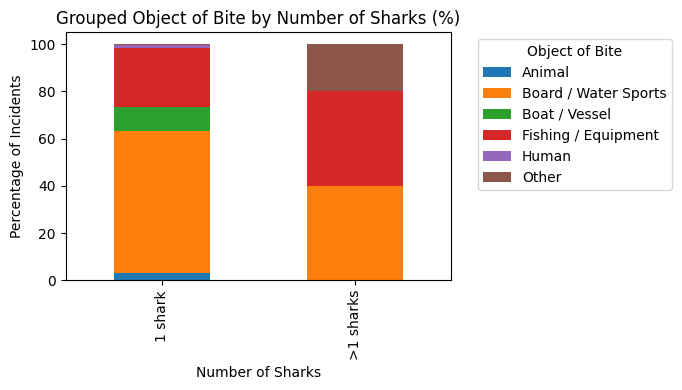

In [ ]:
object_counts = (
    filtered_df
    .groupby(['shark_group', 'object_grouped'])
    .size()
    .unstack(fill_value=0)
)

object_percent = object_counts.div(object_counts.sum(axis=1), axis=0) * 100

object_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(7,4)
)

plt.title("Grouped Object of Bite by Number of Sharks (%)")
plt.xlabel("Number of Sharks")
plt.ylabel("Percentage of Incidents")
plt.legend(title="Object of Bite", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


- Biểu đồ cho thấy trong các vụ việc chỉ có 1 cá mập, đối tượng bị cắn chủ yếu là dụng cụ thể thao dưới nước (Board/Water Sports), chiếm tỷ trọng lớn nhất, tiếp theo là thiết bị đánh bắt cá (Fishing/Equipment) và tàu thuyền; trong khi con người trực tiếp chỉ chiếm tỷ lệ rất nhỏ. 
- Điều này gợi ý rằng các sự cố đơn lẻ thường mang tính tiếp xúc ngẫu nhiên hoặc nhầm lẫn đối tượng. 
- Ở các sự cố có hơn 1 cá mập, tỷ lệ cắn vào thiết bị đánh bắt cá tăng mạnh và xuất hiện rõ rệt nhóm đối tượng khác, trong khi tỷ trọng dụng cụ thể thao dưới nước giảm đáng kể. 
- Sự thay đổi này cho thấy các vụ việc có nhiều cá mập thường gắn với bối cảnh hoạt động đánh bắt hoặc môi trường có mồi, làm gia tăng sự hiện diện và hành vi tập trung của cá mập.

## Kết luận
- Nguy cơ do cá mập gây ra đối với con người không mang tính đồng nhất, mà phụ thuộc đồng thời vào loài cá mập, số lượng cá mập tham gia, và bối cảnh hoạt động của con người
- Chỉ một số loài nhất định (đặc biệt là white shark, tiger shark và bull shark) đóng góp phần lớn vào các ca tấn công nghiêm trọng và tử vong, khẳng định rằng mức độ nguy hiểm cần được đánh giá theo loài cụ thể thay vì nhìn nhận cá mập như một nhóm chung
- Bên cạnh đó, số lượng cá mập có mối tương quan thuận với mức độ nghiêm trọng của hậu quả: các sự cố có nhiều cá mập làm gia tăng đáng kể nguy cơ tử vong, phản ánh vai trò quyết định của quy mô và tính tập trung của hành vi tấn công
- Sự khác biệt về đối tượng bị cắn cho thấy các vụ việc nghiêm trọng hơn thường gắn với môi trường có mồi và hoạt động đánh bắt, trong khi các sự cố đơn lẻ chủ yếu mang tính tiếp xúc ngẫu nhiên trong hoạt động giải trí

=> Rủi ro từ cá mập là kết quả của sự tương tác giữa đặc tính sinh học của loài, điều kiện sinh thái, và hành vi con người, hàm ý rằng các chiến lược quản lý và truyền thông rủi ro cần mang tính phân hóa và dựa trên bối cảnh thay vì tiếp cận đại trà.

## 4.3. Độ sâu tại vị trí xảy ra sự cố ảnh hưởng như thế nào kiểu hành vi tấn công của cá mập?

### Câu hỏi nhỏ
- Các loài cá mập phổ biến (shark_common_name) xuất hiện ở những độ sâu nào?
- Độ sâu có liên quan đến mức độ nghiêm trọng của chấn thương không?
- Đối tượng bị cắn (object_of_bite) thay đổi như thế nào theo độ sâu?

In [689]:
labeled_data = pd.DataFrame({
    'text': [
        'leg', 'lower leg', 'calf', 'foot',
        'arm', 'hand', 'shoulder',
        'torso', 'pelvic region',
        'head', 'face'
    ],
    'label': [
        'Chi dưới','Chi dưới','Chi dưới','Chi dưới',
        'Chi trên','Chi trên','Chi trên',
        'Thân mình','Thân mình',
        'Đầu','Đầu'
    ]
})


In [690]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])

model.fit(labeled_data['text'], labeled_data['label']);


In [691]:
df['injury_location'] = model.predict(df['injury_location'].fillna(''))

In [692]:
depth_df = df[
    (df['depth_of_incident_m'].notna()) &
    (df['depth_of_incident_m'] >= 0)
].copy()
depth_df['object_grouped'] = depth_df['object_of_bite'].apply(group_object)
depth_df['depth_group'] = pd.cut(
    depth_df['depth_of_incident_m'],
    bins=[-0.1, 5, 15, 1000],
    labels=['Shallow (<=5m)', 'Mid (5-15m)', 'Deep (>15m)']
)

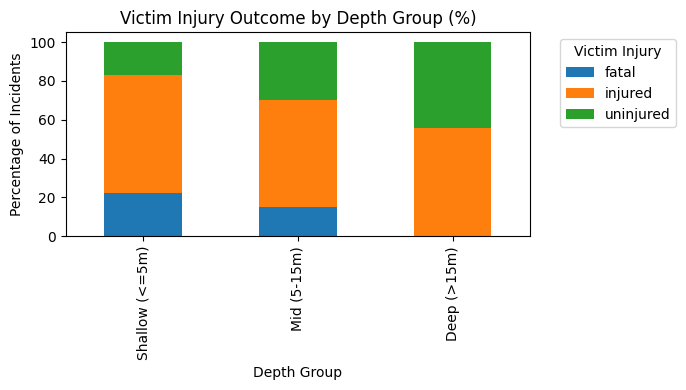

In [ ]:
injury_df = depth_df[depth_df['victim_injury'].notna()].copy()

injury_counts = (
    depth_df
    .groupby(['depth_group', 'victim_injury'], observed=True)
    .size()
    .unstack(fill_value=0)
)

injury_percent = injury_counts.div(
    injury_counts.sum(axis=1), axis=0
) * 100

injury_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(7,4),
    color = ['#C62828', '#FBC02D', '#2E7D32']
)

plt.title("Victim Injury Outcome by Depth Group (%)")
plt.xlabel("Depth Group")
plt.ylabel("Percentage of Incidents")
plt.legend(title="Victim Injury", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show();


- Vùng nông (≤5m): Tỷ lệ bị thương chiếm cao nhất, đồng thời cũng có tỷ lệ tử vong cao nhất so với các nhóm khác. Tỷ lệ không bị thương là thấp nhất.
- Vùng trung bình (5–15m): Tỷ lệ tử vong giảm so với vùng nông, tỷ lệ không bị thương tăng, trong khi bị thương vẫn chiếm tỷ lệ lớn.
- Vùng sâu (>15m): Không có hoặc rất ít tử vong, tỷ lệ không bị thương cao nhất, và tỷ lệ bị thương thấp hơn so với hai nhóm còn lại.
- Khi độ sâu tăng, mức độ nghiêm trọng của thương tích giảm; tỷ lệ tử vong giảm rõ rệt, trong khi khả năng không bị thương tăng lên. Điều này cho thấy các sự cố ở vùng nông có xu hướng nguy hiểm hơn đối với nạn nhân.

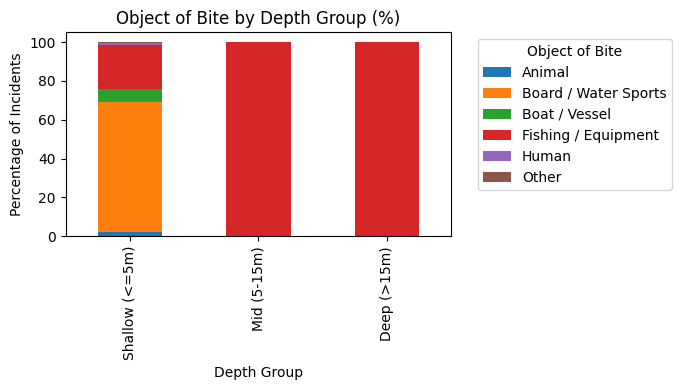

In [694]:
object_df = (depth_df[
    depth_df['object_grouped'] != 'Unknown'
]).copy()

object_counts = (
    object_df
    .groupby(['depth_group', 'object_grouped'], observed=True)
    .size()
    .unstack(fill_value=0)
)

object_percent = object_counts.div(
    object_counts.sum(axis=1), axis=0
) * 100

object_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(7,4)
)

plt.title("Object of Bite by Depth Group (%)")
plt.xlabel("Depth Group")
plt.ylabel("Percentage of Incidents")
plt.legend(title="Object of Bite", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


- Biểu đồ cho thấy vật thể cá mập nhắm tới ban đầu thay đổi theo độ sâu. 
- Ở vùng nước nông (<=5 m), các vụ cắn chủ yếu liên quan đến thiết bị thể thao nước, phản ánh sự chồng lấn không gian giữa cá mập và hoạt động giải trí của con người. 
- Ở vùng trung bình và vùng sâu, các sự cố hoàn toàn gắn với thiết bị đánh bắt cá, cho thấy cá mập bị thu hút bởi mồi và tín hiệu sinh học từ hoạt động nghề cá hơn là con người. 
- Điều này cho thấy các vụ cắn chủ yếu mang tính nhầm lẫn hoặc phản ứng với vật thể, không phải tấn công người có chủ đích.

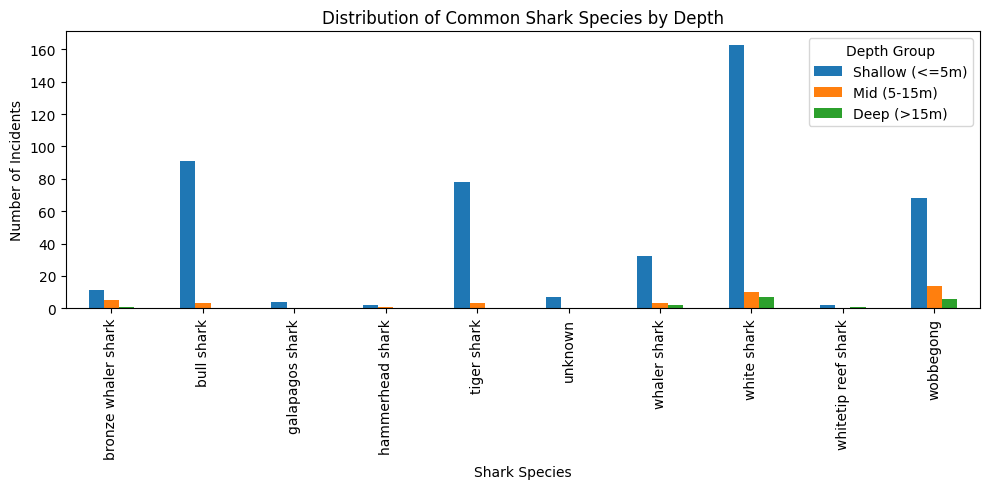

In [695]:
# Lấy top 5 loài cá mập phổ biến
top_species = depth_df['shark_common_name'].value_counts().head(10).index

species_depth = (
    depth_df[depth_df['shark_common_name'].isin(top_species)]
    .groupby(['shark_common_name', 'depth_group'], observed=True)
    .size()
    .unstack(fill_value=0)
)

# Vẽ biểu đồ
species_depth.plot(
    kind='bar',
    figsize=(10,5)
)

plt.title('Distribution of Common Shark Species by Depth')
plt.ylabel('Number of Incidents')
plt.xlabel('Shark Species')
plt.legend(title='Depth Group')
plt.tight_layout()
plt.show()


- Các loài cá mập phổ biến nhất (cá mập trắng, cá mập whaler đồng) chủ yếu xuất hiện ở vùng nông (<=5m).

- Độ sâu dường như không phải yếu tố quan trọng đối với sự hiện diện của hầu hết các loài cá mập, ngoại trừ một vài loài như cá mập trắng, nơi sự cố tập trung ở độ sâu nông.

- Nhóm độ sâu trung bình và sâu có rất ít sự cố so với vùng nông.

- Điều này cho thấy hầu hết các sự cố liên quan đến cá mập xảy ra ở vùng nước nông, và độ sâu có thể không ảnh hưởng nhiều đến sự xuất hiện của hầu hết các loài.

## Kết luận
- Phần lớn các sự cố liên quan đến cá mập xảy ra ở vùng nước nông (≤5m), nơi tập trung nhiều hoạt động giải trí của con người.
- Mức độ nghiêm trọng của sự cố giảm dần theo độ sâu:

    * Vùng nông có tỷ lệ bị thương và tử vong cao nhất.

    * Vùng trung bình giảm rõ rệt tỷ lệ tử vong.

    * Vùng sâu hầu như không có tử vong, tỷ lệ không bị thương cao nhất.
- Các loài xuất hiện nhiều nhất trong sự cố (đặc biệt là cá mập trắng và cá mập whaler đồng) chủ yếu gặp ở vùng nước nông.
- Độ sâu không quyết định sự hiện diện của cá mập, nhưng ảnh hưởng mạnh đến mức độ rủi ro đối với con người.

     **=> Rủi ro cao nhất đến từ sự chồng lấn không gian người – cá mập, chứ không phải do cá mập chủ động tấn công con người. Ở vùng nông, cá mập thường nhầm lẫn thiết bị thể thao nước. Ở vùng trung bình và sâu, sự cố gắn chặt với hoạt động đánh bắt cá, do mồi và tín hiệu sinh học thu hút cá mập.**. 

     **=> Vùng nước nông là khu vực cần ưu tiên quản lý rủi ro, vì mật đọ con người cao, hoạt động giải trí đa dạng và hậu quả sự cố nghiêm trọng hơn**

## 4.4 Liệu đặc điểm nhân khẩu học của nạn nhân có ảnh hưởng đến tính chất sự cố (tính chủ động/bị động, loài cá tấn công) không?

In [696]:
from scipy.stats import chi2_contingency, f_oneway

top_sharks = ['white shark', 'tiger shark', 'bull shark', 'wobbegong']
df_main = df[df['shark_common_name'].isin(top_sharks)].copy()

cols_to_fix = ['victim_age', 'shark_length_m']
for col in cols_to_fix:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Chuyển về số trước
    df[col] = df[col].replace(-1, np.nan) # Thay -1 thành NaN
    df[col] = df[col].replace(0, np.nan)  # Thay 0 thành NaN (nếu có, vì tuổi/chiều dài ko thể = 0)

# 2. Lọc dữ liệu cho phân tích
top_sharks = ['white shark', 'tiger shark', 'bull shark', 'wobbegong']
df_main = df[df['shark_common_name'].isin(top_sharks)].copy()

# Chuẩn hóa cột chữ
df_main['victim_gender'] = df_main['victim_gender'].str.lower().str.strip()
df_main['provoked_unprovoked'] = df_main['provoked_unprovoked'].str.lower().str.strip()

# 3. Loại bỏ dòng thiếu dữ liệu sau khi đã thay -1
# Chỉ giữ lại các dòng có đủ thông tin: Tuổi, Giới tính, Loại tấn công
df_main = df_main.dropna(subset=['victim_age', 'victim_gender', 'provoked_unprovoked'])

# Lọc chỉ lấy Male/Female và Provoked/Unprovoked (bỏ các giá trị lạ)
df_main = df_main[df_main['victim_gender'].isin(['male', 'female'])]
df_main = df_main[df_main['provoked_unprovoked'].isin(['provoked', 'unprovoked'])]


### 4.4.1. Thống kê nạn nhân theo độ tuổi và giới tính

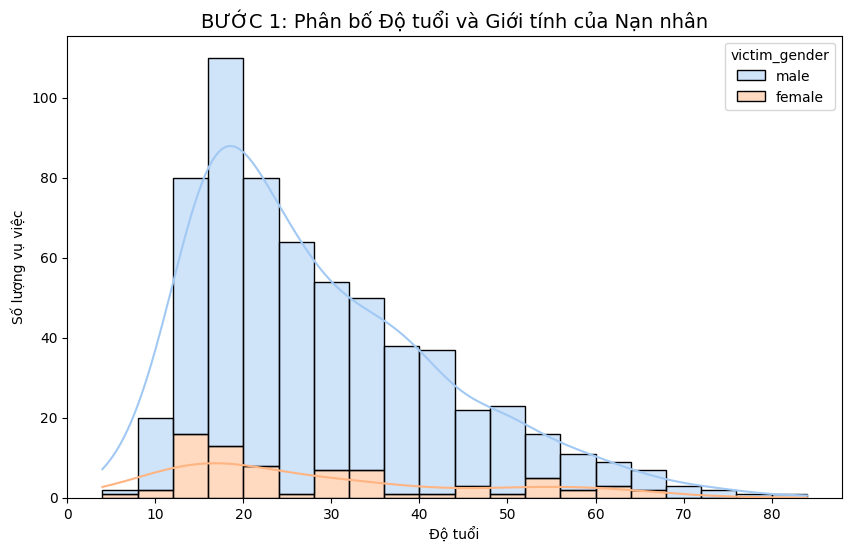

In [697]:
plt.figure(figsize=(10, 6))

# vẽ histogram + đường mật độ (KDE)
sns.histplot(data=df_main, x='victim_age', hue='victim_gender', 
             multiple='stack', kde=True, palette='pastel', bins=20)

plt.title('BƯỚC 1: Phân bố Độ tuổi và Giới tính của Nạn nhân', fontsize=14)
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng vụ việc')
plt.show()

Từ biểu đồ ta thấy:
- Số lượng nạn nhân nam giới nhiều hơn rõ rệt so với nữ giới
- Độ tuổi nạn nhân tập trung nhiều nhất trong khoảng 15-25 tuổi, phân bố lệch phải, số lượng nạn nhân giảm dần khi độ tuổi tăng lên

Nam giới dường như có tần suất bị tấn công cao hơn nhiều so với nữ giới. Độ tuổi 15-30 có số vụ tấn công nhiều hơn hẳn. Liệu sự chênh lệch này là ngẫu nhiên hay do có sự khác biệt trong hành vi theo giới tính và độ tuổi?

### 4.4.2. Tính chất hành vi theo độ tuổi và giới tính

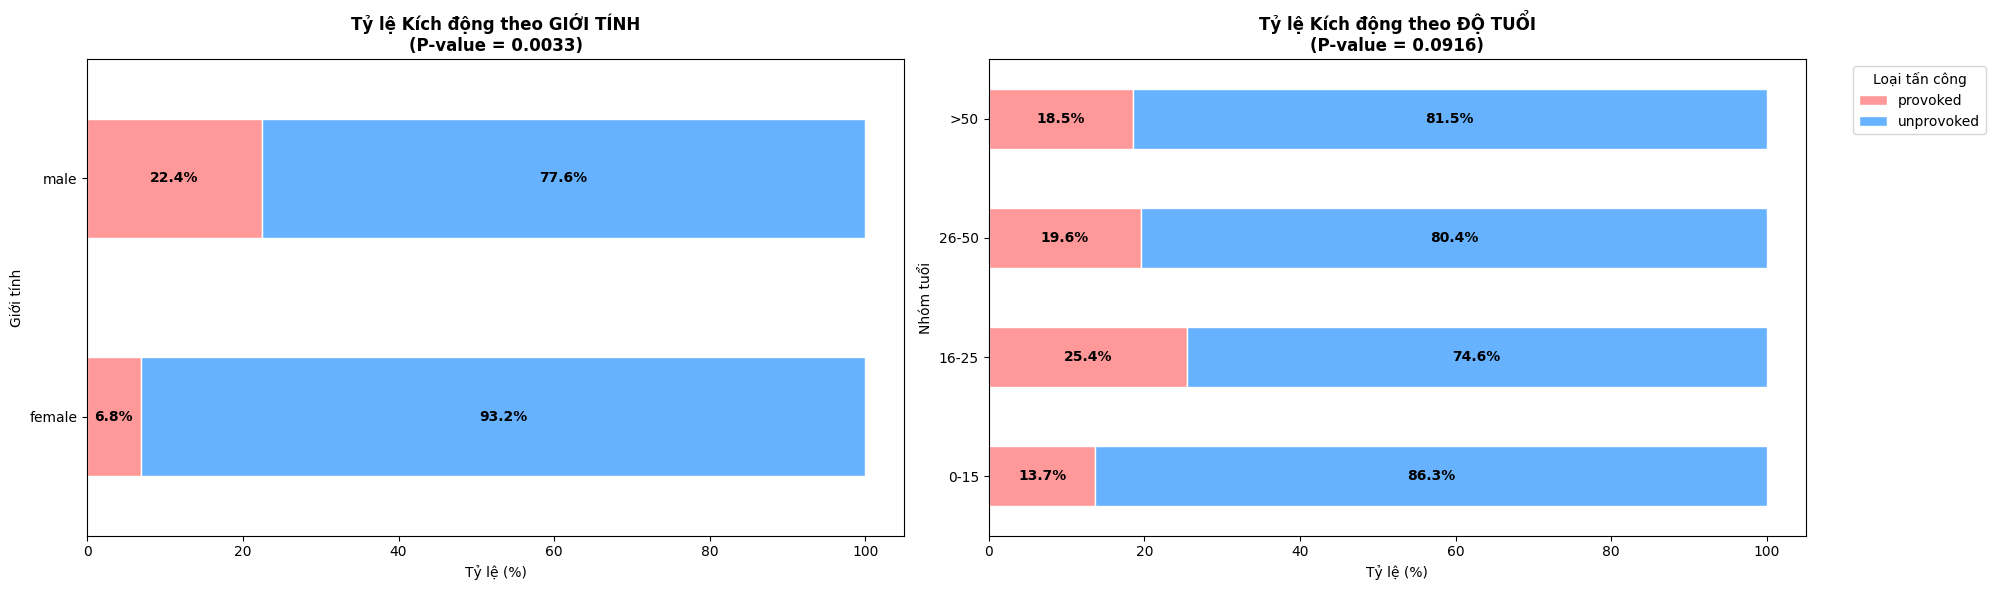

In [698]:
df_viz = df_main.dropna(subset=['victim_age', 'victim_gender', 'provoked_unprovoked']).copy()
bins = [0, 15, 25, 50, 100]
labels = ['0-15', '16-25', '26-50', '>50']
df_viz['age_group'] = pd.cut(df_viz['victim_age'], bins=bins, labels=labels)

# A. Giới tính
ct_gender = pd.crosstab(df_viz['victim_gender'], df_viz['provoked_unprovoked'])
c_g, p_gender, _, _ = chi2_contingency(ct_gender)
ct_gender_pct = ct_gender.div(ct_gender.sum(1), axis=0) * 100

# B. Độ tuổi
ct_age = pd.crosstab(df_viz['age_group'], df_viz['provoked_unprovoked'])
c_a, p_age, _, _ = chi2_contingency(ct_age)
ct_age_pct = ct_age.div(ct_age.sum(1), axis=0) * 100

# --- BƯỚC 3: VẼ BIỂU ĐỒ (SIDE-BY-SIDE) ---
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
colors = ['#ff9999', '#66b2ff'] 

# >>> BIỂU ĐỒ 1: THEO GIỚI TÍNH
ct_gender_pct.plot(kind='barh', stacked=True, color=colors, ax=axes[0], edgecolor='white')
axes[0].set_title(f'Tỷ lệ Kích động theo GIỚI TÍNH\n(P-value = {p_gender:.4f})', fontweight='bold')
axes[0].set_xlabel('Tỷ lệ (%)')
axes[0].set_ylabel('Giới tính')
axes[0].legend().remove() # Tắt legend ở hình 1 cho đỡ rối

# >>> BIỂU ĐỒ 2: THEO ĐỘ TUỔI
ct_age_pct.plot(kind='barh', stacked=True, color=colors, ax=axes[1], edgecolor='white')
axes[1].set_title(f'Tỷ lệ Kích động theo ĐỘ TUỔI\n(P-value = {p_age:.4f})', fontweight='bold')
axes[1].set_xlabel('Tỷ lệ (%)')
axes[1].set_ylabel('Nhóm tuổi')
axes[1].legend(title='Loại tấn công', bbox_to_anchor=(1.05, 1), loc='upper left')

# >>> THÊM NHÃN SỐ LIỆU (%) VÀO GIỮA CỘT
for ax in axes:
    for c in ax.containers:
        # Chỉ hiện nhãn nếu thanh đủ lớn (>5%) để tránh chồng chữ
        labels = [f'{v.get_width():.1f}%' if v.get_width() > 5 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', color='black', weight='bold')

plt.tight_layout()
plt.show()

Biểu đồ cho thấy:
- Các vụ tấn công không do kích động chiếm đa số ở cả hai giới và mọi nhóm tuổi
- Tỷ lệ các vụ tấn công do kích động ở nam giới cao hơn đáng kể so với nữ giới (22,4% so với 6,8%), và sự khác biệt này có ý nghĩa thống kê (p = 0.0033), cho thấy giới tính có mối liên hệ với tính chất của sự cố
- Các nhóm tuổi cũng có sự chênh lệch, tuy nhiên chưa đủ bằng chứng để khẳng định ý nghĩa thống kê (p = 0,0916)

Nam giới dường như có xu hướng tham gia các hành vi mạo hiểm/tương tác trực tiếp với cá mập, làm tăng % các tình huống tấn công do kích động

### 4.4.3. Loài cá mập tấn công 

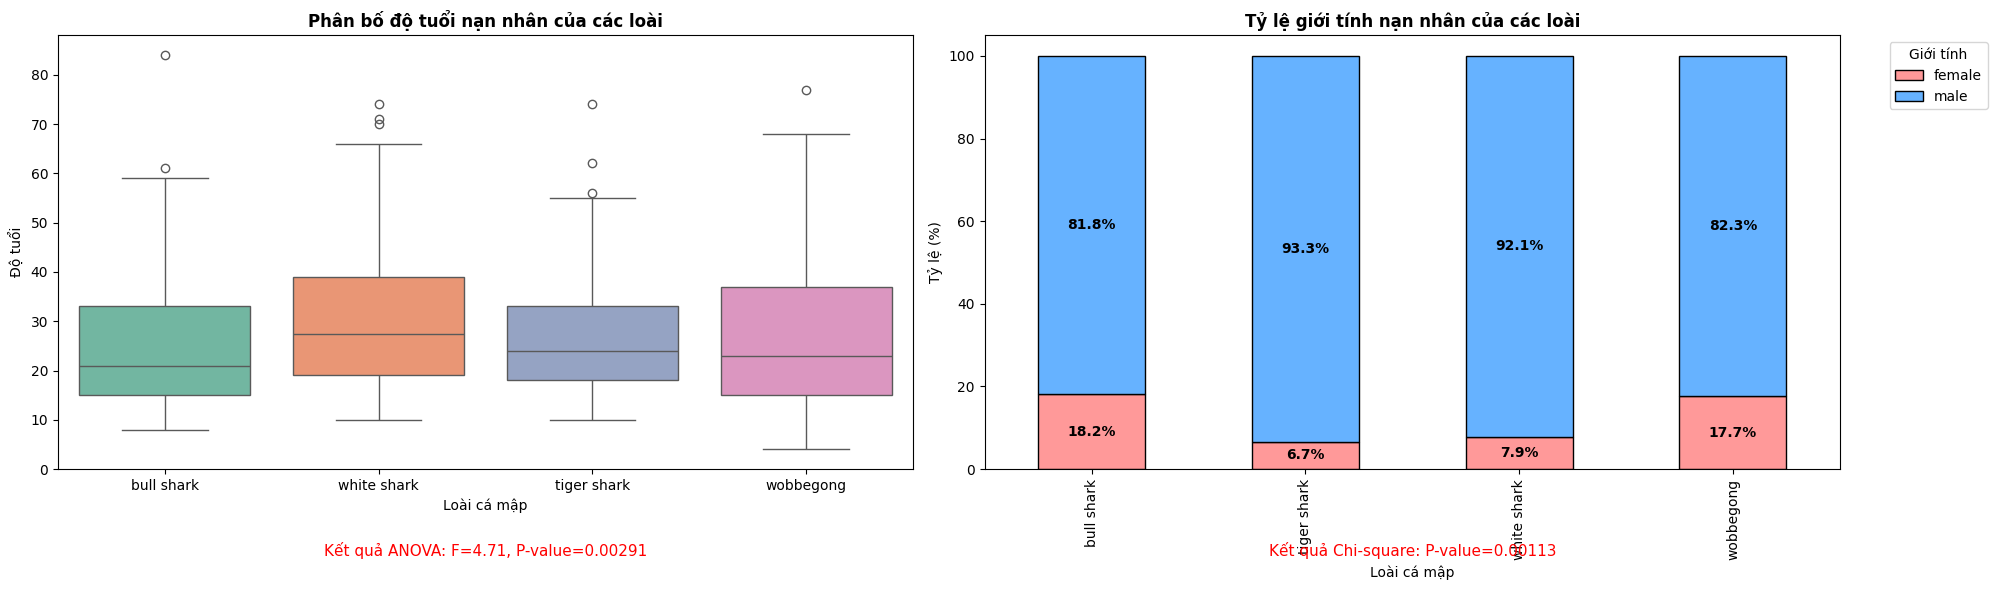

In [699]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, chi2_contingency

# --- BƯỚC 1: CHUẨN BỊ DỮ LIỆU ---
# Đảm bảo df_main đã được lọc các loài chính (top_sharks) và có cột 'victim_age' dạng số
# Nếu chưa có, bạn chạy đoạn này:
# df['victim_age'] = pd.to_numeric(df['victim_age'], errors='coerce')
# top_sharks = ['white shark', 'tiger shark', 'bull shark', 'wobbegong']
# df_main = df[df['shark_common_name'].isin(top_sharks)].copy()
# df_main = df_main.dropna(subset=['victim_age', 'victim_gender'])

# --- BƯỚC 2: VẼ BIỂU ĐỒ SIDE-BY-SIDE ---
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# >>> HÌNH 1: LOÀI vs ĐỘ TUỔI (Boxplot)
sns.boxplot(x='shark_common_name', y='victim_age', data=df_main, palette='Set2', ax=axes[0])
axes[0].set_title('Phân bố độ tuổi nạn nhân của các loài', fontweight='bold')
axes[0].set_ylabel('Độ tuổi')
axes[0].set_xlabel('Loài cá mập')

# Kiểm định ANOVA cho Hình 1
groups = [df_main[df_main['shark_common_name'] == s]['victim_age'] for s in top_sharks]
f_stat, p_val = f_oneway(*groups)
axes[0].text(0.5, -0.2, f'Kết quả ANOVA: F={f_stat:.2f}, P-value={p_val:.5f}', 
            ha='center', fontsize=11, color='red', transform=axes[0].transAxes)

# >>> HÌNH 2: LOÀI vs GIỚI TÍNH (Stacked Bar Chart)
# Tạo bảng chéo và tính %
ct = pd.crosstab(df_main['shark_common_name'], df_main['victim_gender'])
ct_pct = ct.div(ct.sum(1), axis=0) * 100

# Kiểm định Chi-square cho Hình 2
chi2, p_chi2, _, _ = chi2_contingency(ct)

# Vẽ
ct_pct.plot(kind='bar', stacked=True, color=['#ff9999', '#66b2ff'], ax=axes[1], edgecolor='black')
axes[1].set_title('Tỷ lệ giới tính nạn nhân của các loài', fontweight='bold')
axes[1].set_ylabel('Tỷ lệ (%)')
axes[1].set_xlabel('Loài cá mập')
axes[1].legend(title='Giới tính', bbox_to_anchor=(1.05, 1))

# Thêm kết quả Chi-square dưới hình
axes[1].text(0.5, -0.2, f'Kết quả Chi-square: P-value={p_chi2:.5f}', 
            ha='center', fontsize=11, color='red', transform=axes[1].transAxes)

# Gắn nhãn số liệu % lên cột
for c in axes[1].containers:
    # Chỉ hiện số nếu thanh đủ lớn (>5%)
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 5 else '' for v in c]
    axes[1].bar_label(c, labels=labels, label_type='center', color='black', weight='bold')

plt.tight_layout()
plt.show()

Từ biểu đồ ta thấy:
- Độ tuổi nạn nhân chủ yếu tập trung trong khoảng 15–40 tuổi
- White shark có độ tuổi trung vị cao nhất, trong khi bull shark có trung vị thấp nhất
- Một số giá trị ngoại lai xuất hiện ở các loài cho thấy vẫn có những trường hợp nạn nhân ở độ tuổi cao bất thường
- Nam giới chiếm đa số trong các vụ việc ở tất cả các loài cá mập
- Kiểm định ANOVA cho thấy các loài cá mập liên quan đến nạn nhân ở độ tuổi khác nhau (p < 0,05)
- Kiểm định Chi-square cho thấy giới tính của nạn nhân không khác biệt đáng kể giữa các loài (p > 0,05)

Kết quả cho thấy độ tuổi phản ánh rõ sự khác biệt trong hành vi tiếp xúc với từng loài cá mập, trong khi giới tính nạn nhân nhìn chung không thay đổi đáng kể theo loài

### 4.4.4. Kết luận

Giới tính có ảnh hưởng đến tính chất chủ động/bị động của sự cố, trong khi độ tuổi lại có sự liên quan đến loài cá mập mà nạn nhân gặp phải trong sự cố. Điều này sở dĩ do bản chất hành vi của từng giới tính và độ tuổi khác nhau. Nên đưa 2 yếu tố nhân khẩu học này vào cân nhắc khi phân tích nguyên do của một vụ tấn công cụ thể cũng như đưa ra những cảnh báo/tuyên truyền phù hợp theo giới và độ tuổi. 

## 4.5. Question 5: Những yếu tố nào có ảnh hưởng tương đối lớn hơn đến mức độ nghiêm trọng của các vụ tấn công cá mập tại Úc?

Ý tưởng: Sử dụng mô hình Random Forest kết hợp với Permutation Importance để đánh giá mức độ ảnh hưởng của từng yếu tố gốc (feature) đến khả năng xảy ra các vụ tấn công cá mập gây tử vong, đồng thời khắc phục hạn chế của việc mã hóa phân loại bằng cách gom mức độ quan trọng của các biến đã encode về đúng feature 
ban đầu.

Random Forest được sử dụng để học mối quan hệ phức tạp giữa các đặc điểm của vụ tấn công và mức độ nghiêm trọng, trong khi Permutation Importance được áp dụng sau đó nhằm đánh giá mức độ ảnh hưởng thực sự của từng biến đầu vào lên khả năng dự đoán của mô hình bằng cách đo sự suy giảm hiệu năng khi thông tin của biến đó bị xáo trộn.


In [700]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

# Load data
df = pd.read_csv("data/processed/SharkIncident_processed.csv")

In [701]:
# Target: Fatal
df['fatal_binary'] = (df['victim_injury'] == 'fatal').astype(int)

#Các cột liên quan đến target/không dùng
drop_cols = [
    'victim_injury',
    'injury_severity',      
    'injury_location',
    'location',             
    'fatal_binary'
]

X = df.drop(columns=[c for c in drop_cols if c in df.columns])
y = df['fatal_binary']

# Encode các cột phân loại
encoders = {}
cat_cols = X.select_dtypes(include='object').columns

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    X.rename(columns={col: f"{col}_enc"}, inplace=True)
    encoders[col] = le

In [702]:
# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf.fit(X, y);

In [703]:
# Permutation Importance
perm = permutation_importance(
    rf,
    X,
    y,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

perm_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm.importances_mean
}).sort_values(by='Importance', ascending=False)

In [704]:
# Gom importance về feature gốc
perm_importance['Feature_group'] = (
    perm_importance['Feature']
    .str.replace('_enc', '', regex=False)
)

group_importance = (
    perm_importance
    .groupby('Feature_group')['Importance']
    .sum()
    .sort_values(ascending=False)
)

# Display 
print("\n--Feature Importance--")
display(group_importance.head(15))


--Feature Importance--


Feature_group
incident_year                  0.095791
shark_common_name              0.046532
victim_activity                0.043959
shark_behaviour                0.040452
victim_age                     0.040140
shark_length_m                 0.040062
diversionary_action_taken      0.023539
incident_month                 0.018628
shark_identification_method    0.018550
state                          0.014965
victim_aware_of_shark          0.010366
time_of_incident               0.010210
present_at_time_of_bite        0.007872
site_category                  0.007872
direction_first_strike         0.007015
Name: Importance, dtype: float64

### Nhận xét

Kết quả cho thấy mức độ ảnh hưởng của các biến là không đồng đều, trong đó chỉ một số biến có ảnh hưởng thực sự đáng kể:

- incident_year có giá trị importance cao nhất (≈ 0.096). Tuy nhiên, đây là biến thời gian, phản ánh xu hướng ghi nhận và thay đổi bối cảnh xã hội theo năm. Nếu đưa biến này vào clustering, mô hình rất dễ tách cụm theo mốc thời gian (vụ cũ – vụ mới) thay vì các đặc điểm hành vi, sinh học và hoàn cảnh môi trường. Vì vậy, biến incident_year không được chọn cho bước gom cụm.

- shark_common_name (≈ 0.0465) – phản ánh sự khác biệt về mức độ nguy hiểm giữa các loài cá mập.

- victim_activity (≈ 0.0440) – thể hiện hành vi của con người tại thời điểm xảy ra sự cố, yếu tố quan trọng ảnh hưởng đến mức độ nghiêm trọng.

- shark_behaviour (≈ 0.0405) – mô tả trạng thái/hành vi của cá mập khi tấn công, gắn trực tiếp với cơ chế gây thương tích.

- victim_age (≈ 0.0401) – đại diện cho khả năng xử lí, chống chịu của nạn nhân.

- shark_length_m (≈ 0.0401) – đại diện cho kích thước và sức sát thương tiềm tàng của cá mập.

## 4.6 Có thể phân nhóm các vụ tấn công thành các mẫu hình (patterns) riêng biệt dựa trên sự kết hợp của nhiều yếu tố (như vị trí, độ sâu, hoạt động, loài cá mập, ...) không?


In [705]:
# import thư viện cần thiết
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE

import seaborn as sns
import pandas as pd

In [706]:
# load dữ liệu đã xử lý
df = pd.read_csv('data/processed/SharkIncident_processed.csv')
# Tạo biến nhị phân tử vong
df['fatal_binary'] = (df['victim_injury'] == 'fatal').astype(int)


### 4.6.1. Xác định trọng số cho các đặc trưng

In [800]:
# tính trọng số cho các đặc trưng (dùng Random Forest) 
features = [
    'shark_common_name',
    'victim_activity',
    'shark_behaviour',
    'victim_age',
    'shark_length_m'
]

numeric_features = ['victim_age', 'shark_length_m']
categorical_features = [
    'shark_common_name',
    'victim_activity',
    'shark_behaviour'
]

# =========================
# 2. Trọng số từ Permutation Importance (đã chọn lọc)
# =========================
feature_importance = {
    'shark_common_name': 0.046532,
    'victim_activity': 0.043959,
    'shark_length_m': 0.040062,
    'state': 0.014965
}

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), numeric_features),
        ('cat', Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')), ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]), categorical_features)
    ])

# Fit & Transform
X_scaled = preprocessor.fit_transform(df[features])
encoded_feature_names = preprocessor.get_feature_names_out()
weights = np.ones(len(encoded_feature_names))

for i, fname in enumerate(encoded_feature_names):
    for original_feature, imp in feature_importance.items():
        if original_feature in fname:
            weights[i] = 1 + imp * 5  # cùng công thức như bạn dùng trước
            break

X_weighted = X_scaled * weights

### 4.6.2. Tìm số cụm (K)

In [801]:
# tính 2 chỉ số inertia và silhouette với từng K
inertia = []
sil_scores = []
K_range = range(2, 9)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_weighted)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_weighted, km.labels_))

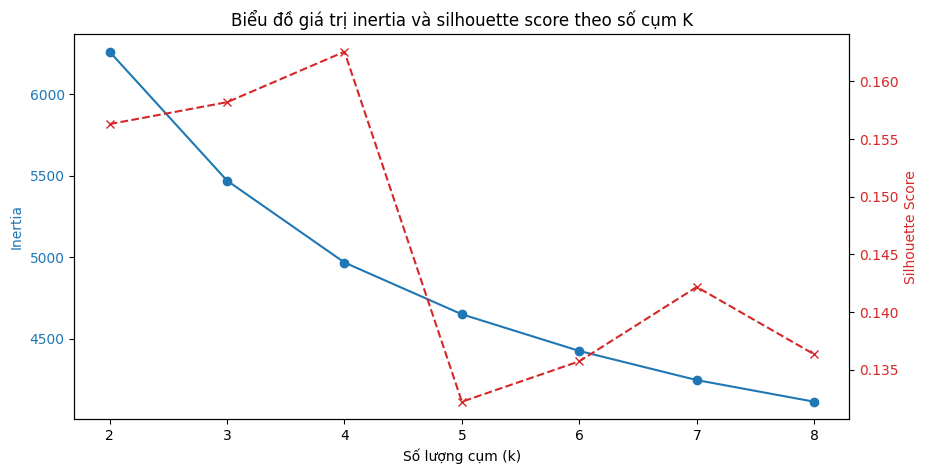

In [802]:
# vẽ biểu đồ giá trị 2 chỉ số với các K
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.set_xlabel('Số lượng cụm (k)')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(K_range, inertia, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(K_range, sil_scores, marker='x', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Biểu đồ giá trị inertia và silhouette score theo số cụm K')
plt.show()

In [803]:
# chọn K=3 dựa trên biểu đồ
final_k = 4

### 3.6.3. Thực hiện gom cụm bằng 3 loại mô hình

In [804]:
# K-Means
kmeans = KMeans(n_clusters=final_k, random_state=42, n_init=10)
labels_km = kmeans.fit_predict(X_weighted)

# Agglomerative (Gom cụm phân cấp)
agglo = AgglomerativeClustering(n_clusters=final_k, linkage='ward')
labels_agg = agglo.fit_predict(X_weighted)

# GMM (Gaussian Mixture)
gmm = GaussianMixture(n_components=final_k, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X_weighted)

In [805]:
# tính toán các chỉ số đánh giá
def get_metrics(X, labels):
    return (silhouette_score(X, labels), davies_bouldin_score(X, labels), calinski_harabasz_score(X, labels))

m_km = get_metrics(X_weighted, labels_km)
m_agg = get_metrics(X_weighted, labels_agg)
m_gmm = get_metrics(X_weighted, labels_gmm)

In [806]:
# in kết quả đánh giá 3 thuật toán
print(f"{'Metric':<25} | {'K-Means':<15} | {'Agglomerative':<15} | {'GMM':<15}")
print("-" * 80)
print(f"{'Silhouette (Max 1)':<25} | {m_km[0]:.4f}          | {m_agg[0]:.4f}          | {m_gmm[0]:.4f}")
print(f"{'Davies-Bouldin (Min 0)':<25} | {m_km[1]:.4f}          | {m_agg[1]:.4f}          | {m_gmm[1]:.4f}")
print(f"{'Calinski-Harabasz (Max)':<25} | {m_km[2]:.1f}          | {m_agg[2]:.1f}          | {m_gmm[2]:.1f}")


Metric                    | K-Means         | Agglomerative   | GMM            
--------------------------------------------------------------------------------
Silhouette (Max 1)        | 0.1626          | 0.1219          | -0.0204
Davies-Bouldin (Min 0)    | 1.8609          | 2.1973          | 4.1123
Calinski-Harabasz (Max)   | 207.8          | 153.4          | 50.0


### 3.6.4. Trực quan hoá kết quả

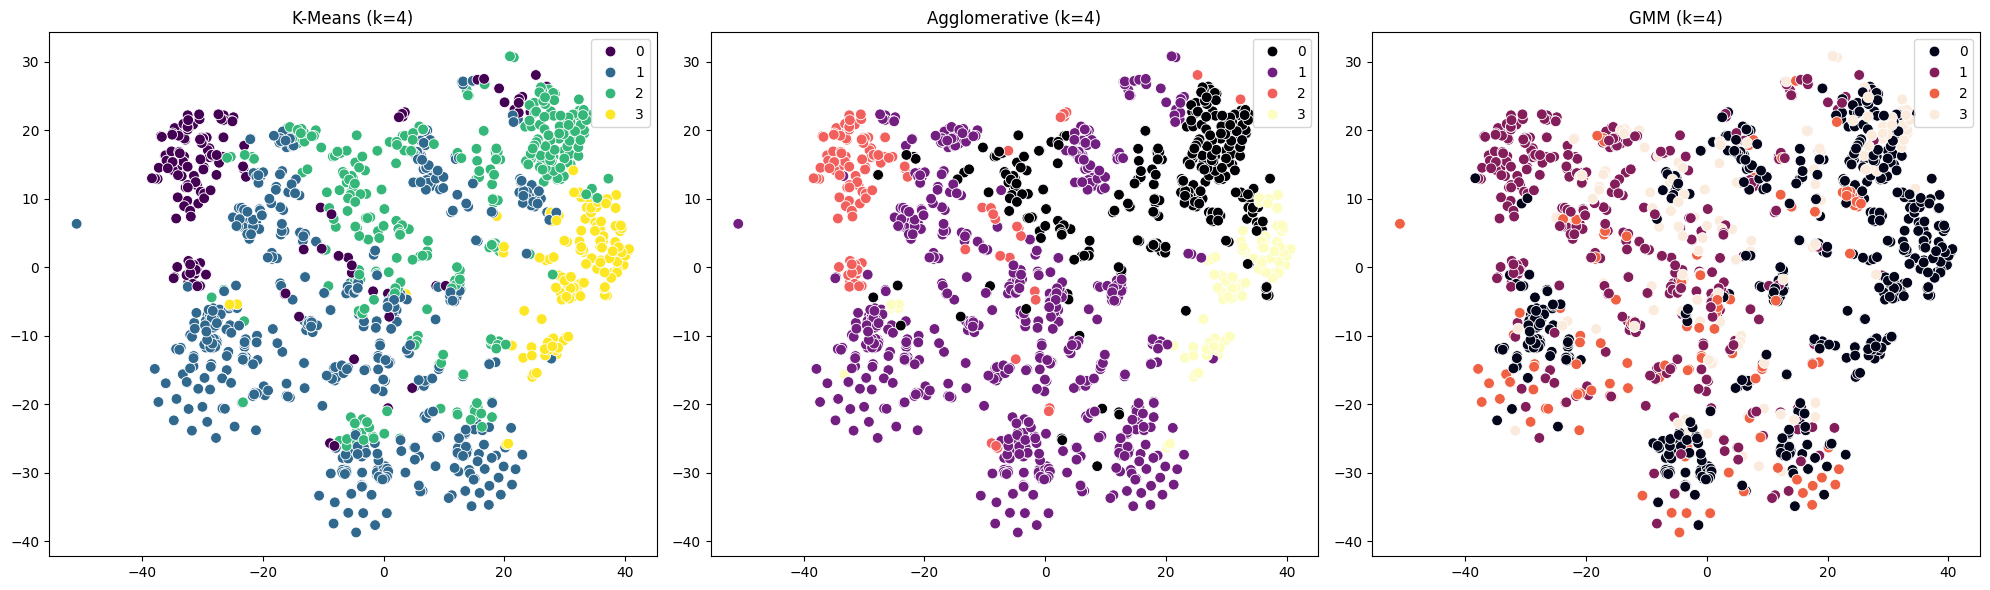

In [807]:
# trực quan hóa kết quả phân cụm với t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
X_tsne = tsne.fit_transform(X_weighted)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
# K-Means
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels_km, palette='viridis', ax=axes[0], s=60)
axes[0].set_title(f'K-Means (k={final_k})')
# Agglomerative
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels_agg, palette='magma', ax=axes[1], s=60)
axes[1].set_title(f'Agglomerative (k={final_k})')
# GMM
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels_gmm, palette='rocket', ax=axes[2], s=60)
axes[2].set_title(f'GMM (k={final_k})')
plt.tight_layout()
plt.show()

### 4.6.5. Gom những giá trị thiêu số thành nhóm

In [792]:
# tạo đặc trưng mùa ('season')
def get_season(month):
    if month in [12, 1, 2]: return 'Summer'
    elif month in [3, 4, 5]: return 'Autumn'
    elif month in [6, 7, 8]: return 'Winter'
    else: return 'Spring'
df['season'] = df['incident_month'].apply(get_season)

In [793]:
# tạo đặc trưng nhóm cá mập (nhóm các loài cá mập ít phổ biến lại thành 'Other')
top_sharks = ['white shark', 'tiger shark', 'bull shark', 'wobbegong']
df['shark_group'] = df['shark_common_name'].apply(lambda x: x if x in top_sharks else 'Other')

In [794]:
# tạo đặc trưng nhóm các hoạt động (nhóm các hoạt động kém phổ biến lại thành 'Other')
top_activities = ['swimming', 'surfing', 'fishing', 'diving']
df['activity_group'] = df['victim_activity'].astype(str).apply(
    lambda x: next((act for act in top_activities if act in x.lower()), 'Other')
)

In [795]:
# tạo đặc trưng xác định mức độ nghiêm trọng (fatal/non-fatal)
df['is_fatal'] = df['victim_injury'].apply(lambda x: 1 if 'fatal' in str(x).lower() else 0)

In [796]:
# định dạng lại độ dài cá mập
df['shark_length_m'] = pd.to_numeric(df['shark_length_m'], errors='coerce')
df.loc[df['shark_length_m'] <= 0, 'shark_length_m'] = np.nan

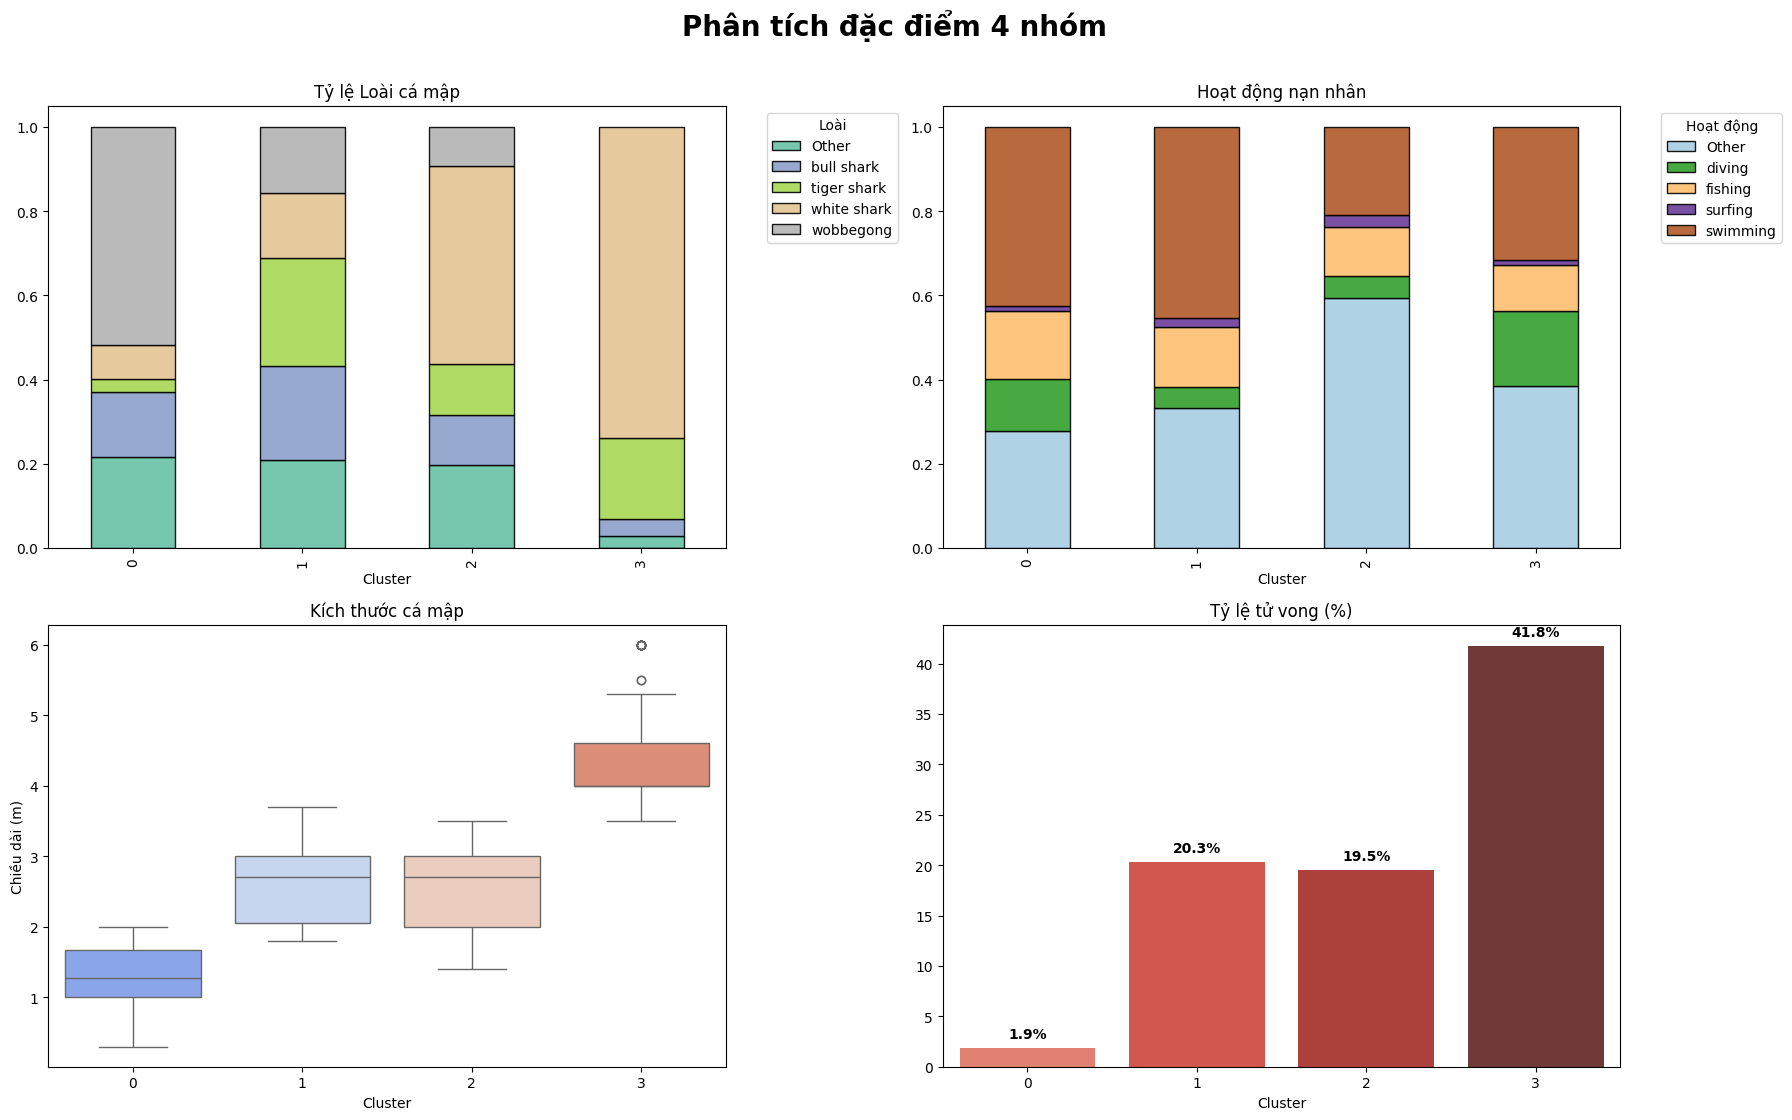

In [808]:
# Gán nhãn K-Means vào DF
df['Cluster'] = labels_km

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.suptitle(f'Phân tích đặc điểm {final_k} nhóm', fontsize=20, fontweight='bold', y=0.96)

# loài (stacked bar)
pd.crosstab(df['Cluster'], df['shark_group'], normalize='index').plot(
    kind='bar', stacked=True, ax=axes[0, 0], colormap='Set2', edgecolor='black', alpha=0.9
)
axes[0, 0].set_title('Tỷ lệ Loài cá mập')
axes[0, 0].legend(title='Loài', bbox_to_anchor=(1.05, 1))

# hoạt động nạn nhân (stacked bar)
pd.crosstab(df['Cluster'], df['activity_group'], normalize='index').plot(
    kind='bar', stacked=True, ax=axes[0, 1], colormap='Paired', edgecolor='black', alpha=0.9
)
axes[0, 1].set_title('Hoạt động nạn nhân')
axes[0, 1].legend(title='Hoạt động', bbox_to_anchor=(1.05, 1))

# kích thước (boxplot)
sns.boxplot(x='Cluster', y='shark_length_m', data=df, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Kích thước cá mập')
axes[1, 0].set_ylabel('Chiều dài (m)')

# tỷ lệ tử vong (bar)
fatal_rates = df.groupby('Cluster')['is_fatal'].mean() * 100
sns.barplot(x=fatal_rates.index, y=fatal_rates.values, ax=axes[1, 1], palette='Reds_d')
axes[1, 1].set_title('Tỷ lệ tử vong (%)')
for i, v in enumerate(fatal_rates):
    axes[1, 1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [810]:
summary = df.groupby('Cluster').agg({
    'shark_group': lambda x: x.mode()[0],
    'shark_length_m': 'mean',
    'is_fatal': 'mean',
    'state': lambda x: x.mode()[0]
}).reset_index()
summary['Tỷ lệ tử vong'] = (summary['is_fatal'] * 100).round(1).astype(str) + '%'
summary['Kích thước cá mập TB (m)'] = summary['shark_length_m'].round(2)

summary_final = summary[[
    'shark_group',
    'Kích thước cá mập TB (m)',
    'Tỷ lệ tử vong',
    'state'
]]

print(summary_final)


   shark_group  Kích thước cá mập TB (m) Tỷ lệ tử vong state
0    wobbegong                      1.31          1.9%   nsw
1  tiger shark                      2.65         20.3%   qld
2  white shark                      2.59         19.5%   nsw
3  white shark                      4.34         41.8%   nsw


Từ kết quả phân cụm, ta có thể chia thành 3 nhóm:

1. Nhóm Rủi ro Thấp (Nhóm 0)
- Loài chiếm đa số là Wobbegong, kích thước nhỏ (trung bình 1.31m), tỉ lệ gây tử vong rất thấp (chỉ 1.9%)

- Phân tích nguyên nhân: Do loài cá mập này có kích thước nhỏ, thường sinh sống ở khu vực đáy gần bờ. Do đó, hành vi cắn có khả năng là phản ứng tự vệ khi các hoạt động của con người vô tình xâm phạm hoặc kích động khu vực sinh sống của chúng, chứ không phải là một vụ tấn công có chủ đích.

2. Nhóm Rủi ro Cao (Nhóm 3)
- Đại diện là Cá mập Trắng (White Shark) với kích thước cực lớn (trung bình lên đến 4.34m), tỉ lệ gây tử vong rất cao (đạt 41.8%).

- Phân tích nguyên nhân: Là loài cá săn mồi đỉnh cao, đặt biệt khi kích thước càng lớn càng nhiều khả năng gây ra các vết thương chí mạng, do đó có tỉ lệ gây tử vong rất cao.

3. Nhóm Rủi ro Vừa (Nhóm 1+2)
- Với kích thước cá mập trung bình khoảng 2.59m đến 2.65m, và tỷ lệ tử vong dao động quanh 19.5% đến 20.3%.
- Phân tích nguyên nhân: Nhóm cá mập có kích thước trung bình có tỉ lệ gây tử vong không cực đoan như nhóm rủi ro Cao nhưng vẫn nên chú ý.

### 3.6.6. Nhận xét 

# 5. PROJECT SUMMARY

## 5.1. Key findings
## 5.2. Limitations
## 5.3. Future directions
## 5.4. Individual reflections

### 5.4.1. Thành viên 1
- Họ tên MSSV
- Challenges & Difficulties Encountered
- Learning & Growth